# <center style="font-size:140%;"> Report - Project 4

<center>
<span style="font-size:160%;">**McGill University, Montreal** </span> <br>
MECH(447|652) - Dynamics of Combustion <br>
Project 4
</center>

<center>Submitted to 
<center>**Gilles Bourque**
<center>by
<center>**Saad Malik (260559335)**

<center>$5^{th}$ December 2018
<center>Montreal, Quebec, Canada

## Table of Content

* [Introduction](#Introduction)

* [Part 1 - Non-premixed Flames ](#Part-1---Non-premixed flames)
    * [1.1 - Temperature T, mass fraction of oxygen $(O_2)$ ,ethane $(C_2H_6)$ vs nozzle spacing ](#Temperature T, mass fraction of oxygen $(O_2)$ ,ethane $(C_2H_6)$ vs nozzle spacing)
    * [1.2 - The temperature T, mass fraction of oxygen $(O_2)$ and of ethane $(C_2H_6)$ as function of the mixture fraction Z (Bilgers Mixture Faction)](#The temperature T, mass fraction of oxygen $(O_2)$ and of ethane $(C_2H_6)$ as function of the mixture fraction Z (Bilgers Mixture Faction))
    * [1.3 - Compare the peak flame temperature with the equilibrium temperature, $T_{ad}$](#Compare the peak flame temperature with the equilibrium temperature, $T_{ad}$)
    * [1.4 - Plot the $T$ profile and mass fraction of oxygen $Y(O_2)$ and of ethane $Y(C_2H_6)$ as function of mixture fraction Z](#On one graph, plot the $T$ profile and mass fraction of oxygen $Y(O_2)$ and of ethane $Y(C_2H_6)$ as function of mixture fraction Z)
    * [Bonus Question](#Bonus Question)
    
* [Part 2.1 - Un-stretched, Freely-propagating, Laminar Premixed Flame](## Part 2 - Un-stretched, Freely-propagating, Laminar Premixed Flame) 
    * [2.1 a - Conversion of spatial coordinates to temporal coordinates](#Conversion of spatial coordinates to temporal coordinates)
    * [2.1 b - Mass Fraction VS Time & Temperature VS Heat Release VS Time](#Mass Fraction VS Time & Temperature VS Heat Release VS Time)
    * [2.1 c - Reaction Rate VS Time ${\varphi }_R$](#Reaction Rate VS Time)
    * [2.1 d - Repeat simulation with $\phi$=0.600, 0.625, 0.650, 0.675, and 0.700](#Repeat simulation with $\phi$=0.600, 0.625, 0.650, 0.675, and 0.700)
    * [2.1 e  - Laminar flame speed ($S_L$) as function of the equivalence ratio $\phi$=0.4 to 1.4 in steps of 0.20](#Laminar flame speed ($S_L$) as function of the equivalence ratio $\phi$=0.4 to 1.4 in steps of 0.20)
    * [2.1 Redo the above simulation but replacing $N_2$ in the air with $CO_2$ and plot the two set of results on one graph and explain your results](#Redo the above simulation but replacing $N_2$ in the air with $CO_2$ and plot the two set of results on one graph and explain your results)
    * [2.1 g - For $T_{ini}$ = 700K and $\phi$=0.6, calculate the laminar flame speed ($S_L$) as function of pressure](#For $T_{ini}$ = 700K and $\phi$=0.6, calculate the laminar flame speed ($S_L$) as function of pressure)
    
 * [Part 2.2- Sensitivity Analysis](#Sensitivity Analysis)
       
* [Conclusion](#Conclusion)

# Introduction

In a diffusion flame, combustion takes place at the flame surface only, where the fuel meets oxygen in the right concentration -the interior of the flame contains unburnt fuel.The red or orange colour we see from reflected light is due to the emission of soot particles. The luminous flame is a type of a diffusion flame that is, a burning flame which is visible. The rate of diffusion limits the flame speed. Diffusion flames tend to burn slower and produce more soot than premixed flames, it must be noted there can be exceptions to this rule. The soot typically produced in a diffusion flame becomes incandescent from the heat of the flame which results in the identifiable orange-yellow color. Diffusion flames tend to have a less-localized flame front than premixed flames.

A premixed flame is a flame formed under certain conditions during the combustion of a premixed charge (also called pre-mixture) of fuel and oxidiser. The best example of this type of flame is the common Bunsen flame, in which the premixed gases flow up a burner tube at a rate higher than the normal burning velocity of the mixture, a steady flame being maintained above the burner top. The premixed flames are most used for domestic heating in gas fires and for cooking. 

For Part 1 of the project, we will investigate the characteristics of a counterflow non-premixed flame. We will consider a fuel inlet composed of pure ethane, $Y(C_2H_6)$ = 1.0, and an air inlet with the usual composition; $Y(O_2)$ = 0.21, $Y(N_2)$ = 0.79.

As for Part 2 of the project, we will investigate different aspects of a laminar premixed flame and how they can be used to make basic calculations related to combustion systems. For example, pollutant emissions ($NO_x$ and $CO$), can be evaluated as function of combustor residence time. Effect of richness and pressure can also be estimated with this approach.

In [16]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

# Part 1: Non-premixed Flames

## Introduction

An alternative mean to describe the fuel-air composition was presented in the non-premixed flame lecture. The mixture fraction can be defined in terms of fuel and air inlets composition either based on species or atomic elements. In this part of the assigment, we are asked to investigate the characteristics of a counter flow non-premixed flame.
The concept of a counterflow burner is schematized below:
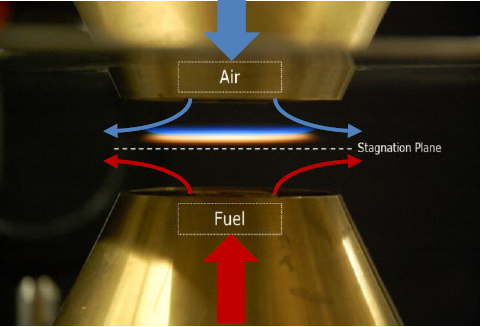

We will consider a fuel inlet composed of pure ethane (Y(C2H6) = 1.0) and an air inlet with the usual
composition (Y(O2) = 0.21, Y(N2) = 0.79), as stream 1 and 2, respectively. For your setup, the nozzles
spacing will be 2 cm and an air inlet velocity of 1.5 m/s. To stabilize the flame approximately halfway
between the nozzles, the total pressure of both streams is equalized. We are to use the counter flow diffusion reactor in cantara. 


## 1.1 Temperature T, mass fraction of oxygen $(O_2)$ ,ethane $(C_2H_6)$ vs nozzle spacing 

In [17]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

P0    = ct.one_atm
T0    = 300.0

comp_a =  'O2:0.23, N2:0.77'
comp_f =  'C2H6:1'

u_air = 1.5

mech  = 'gri30.cti'
g_gri = ct.Solution(mech,'gri30_mix')
g_gri.TPX    = T0, P0, comp_a
air_density  = g_gri.density
g_gri.TPX    = T0, P0, comp_f
fuel_density = g_gri.density

mdot_a = u_air*air_density
mdot_f = np.sqrt((u_air**2)*air_density*fuel_density)

initial_grid = 0.02*np.linspace(0,1,40) #m

tol_ss = [1.0e-5, 1.0e-20]
tol_ts = [5.0e-3, 1.0e-20]

loglevel    = 1

f = ct.CounterflowDiffusionFlame(g_gri, initial_grid)

f.flame.set_steady_tolerances(default=tol_ss)
f.flame.set_transient_tolerances(default=tol_ts)

f.oxidizer_inlet.mdot = mdot_a
f.oxidizer_inlet.X    = comp_a
f.oxidizer_inlet.T    = T0


f.fuel_inlet.mdot     = mdot_f
f.fuel_inlet.X        = comp_f
f.fuel_inlet.T        = T0


f.set_initial_guess()

f.solve(loglevel, refine_grid=False)

f.energy_enabled = True
f.set_refine_criteria(ratio=2, slope=0.2, curve=0.3, prune=0.1)
f.solve(loglevel, refine_grid=True)


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.335e-06      7.216
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.281e-05      6.465
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.773e-05      6.106
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001096      5.935
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0006242      5.302
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00711      2.899
Attempt Newton solution of steady-state problem...    success.

Problem solved on [40] point grid(s).

..............................................................................
grid refinement disabled.

.....................................................................

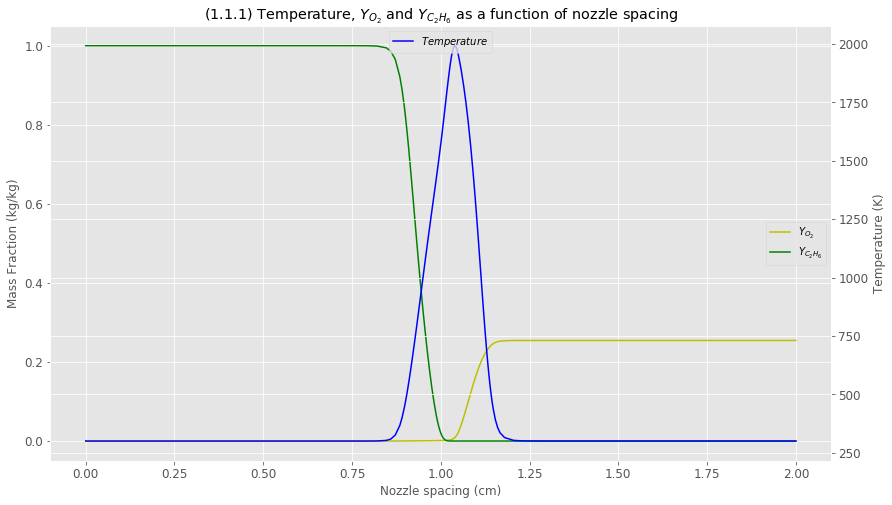

In [18]:
noC = g_gri.element_index('C')
noO = g_gri.element_index('O')
noH = g_gri.element_index('H')

nO2  = g_gri.species_index('O2')
nCH4 = g_gri.species_index('CH4')
nC2H6 = g_gri.species_index('C2H6')
nCO2 = g_gri.species_index('CO2')
nCO  = g_gri.species_index('CO')
nNO  = g_gri.species_index('NO')

nspecies = g_gri.n_species

MW    = g_gri.molecular_weights
MWc   = MW[g_gri.species_index('C')]
MWo2  = MW[g_gri.species_index('O2')]
MWo   = MW[g_gri.species_index('O')]
MWh   = MW[g_gri.species_index('H')]
MWn2  = MW[[g_gri.species_index('N2')]]
MWc2h6 = (2*MWc)+(6*MWh)
MWair = MWo2+(3.76*MWn2)

T_sol = f.T
Y_sol   = f.Y
Y_C2H6in = Y_sol[nC2H6,0]
Y_C2H6   = Y_sol[nC2H6]
Y_O2in  = Y_sol[nO2,-1]
Y_O2    = Y_sol[nO2]

fig, ax1 = plt.subplots(figsize=(14,8))
fig.set_tight_layout(False)
ax2 = ax1.twinx()

ax1.plot(f.flame.grid*100, Y_O2,'y', label=r'$O_{2}$')
ax1.plot(f.flame.grid*100, Y_C2H6,'g', label=r'$C_{2}H_{6}$')
ax2.plot(f.flame.grid*100, T_sol,'b', label=r'$Temperature$')

plt.title('(1.1.1) Temperature, $Y_{O_2}$ and $Y_{C_2H_6}$ as a function of nozzle spacing')
ax1.set_xlabel('Nozzle spacing (cm)')
ax2.set_ylabel('Temperature (K)')
ax1.set_ylabel('Mass Fraction (kg/kg)')

ax2.legend(['$Temperature$'],loc=9)
ax1.legend(['$Y_{O_2}$','$Y_{C_2H_6}$'], loc=5)

The mass franction for Ethane $(C_2H_6)$ is seen to stay constant till a nozzle spacing of around 0.85, it then decreases continuouly till it reaches zero at a nozzle sapcing of 1cm, after which its constant. 

The mass fraction for oxygen $(O_2)$ is constant till a nozzle spacing of 1cm after which it gradually increases to a value of around 0.3 (kg/kg) after which it maintaines that value.

The temperature is contant till a nozzle spacing value of 0.875 cm , after which it increases to a peak valye of 1.0kg/kg then decreases back to zero at around 1.20 cm (Nozzle spacing) after which it becomes constant.

## 1.2  The temperature T, mass fraction of oxygen $(O_2)$ and of ethane $(C_2H_6)$ as function of the mixture fraction Z (Bilgers Mixture Faction) 

In this part we are asked to implement the Bilger’s mixture fraction, Z, and replot the temperature T, mass fraction of oxygen
Y(O2) and of ethane Y(C2H6) as function of the mixture fraction Z on one graph. We are also asked to describe your results and compare to Burke-Schumann analytical solution. 


In [19]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

P0    = ct.one_atm
T0    = 300.0

comp_a =  'O2:0.23, N2:0.77'
comp_f =  'C2H6:1'

u_air = 1.5

mech  = 'gri30.cti'
g_gri = ct.Solution(mech,'gri30_mix')
g_gri.TPX    = T0, P0, comp_a
air_density  = g_gri.density
g_gri.TPX    = T0, P0, comp_f
fuel_density = g_gri.density

mdot_a = u_air*air_density
mdot_f = np.sqrt((u_air**2)*air_density*fuel_density)

initial_grid = 0.02*np.linspace(0,1,40)

tol_ss = [1.0e-5, 1.0e-20]
tol_ts = [5.0e-3, 1.0e-20]

loglevel    = 1
refine_grid = 1

f.flame.set_transient_tolerances(default=tol_ts)

f.flame.set_steady_tolerances(default=tol_ss)

f = ct.CounterflowDiffusionFlame(g_gri, initial_grid)


f.oxidizer_inlet.mdot = mdot_a
f.oxidizer_inlet.X    = comp_a
f.oxidizer_inlet.T    = T0


f.fuel_inlet.mdot     = mdot_f
f.fuel_inlet.X        = comp_f
f.fuel_inlet.T        = T0


f.set_initial_guess()

f.solve(loglevel, refine_grid=False)

f.energy_enabled = True
f.set_refine_criteria(ratio=2, slope=0.2, curve=0.3, prune=0.1)
f.solve(loglevel, refine_grid=refine_grid)


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.335e-06      7.268
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.281e-05      6.501
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.773e-05      6.125
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001461      5.886
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00111      4.919
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01264      1.524
Attempt Newton solution of steady-state problem...    success.

Problem solved on [40] point grid(s).

..............................................................................
grid refinement disabled.

.....................................................................

(0, 1)

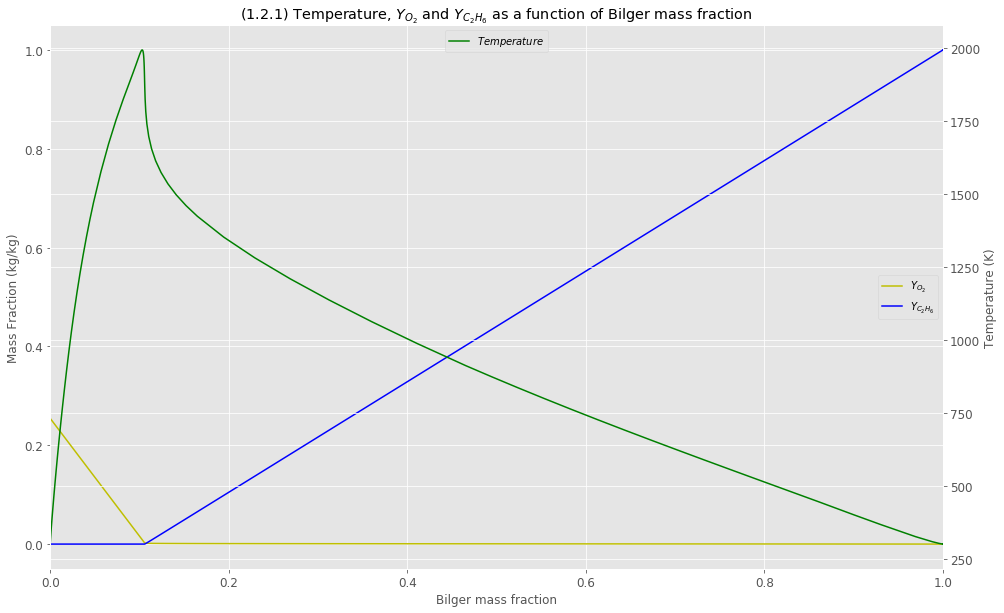

In [20]:
grid  = f.grid
T_sol = f.T
Y_sol   = f.Y
Y_C2H6in = Y_sol[nC2H6,0]
Y_C2H6   = Y_sol[nC2H6]
Y_O2in  = Y_sol[nO2,-1]
Y_O2    = Y_sol[nO2]

Zc1 = np.zeros((len(grid),1))
Zh1 = np.zeros((len(grid),1))
Zc  = np.zeros((len(grid),1))
Zh  = np.zeros((len(grid),1))
Zo  = np.zeros((len(grid),1))
Z   = np.zeros((len(grid),1))

m=1
n=4
nuO2=2

Zc1 = MWc*Y_C2H6in/MWc2h6
Zh1 = 4*MWh*Y_C2H6in/MWc2h6
Zc  = MWc*Y_C2H6/MWc2h6
Zh  = 4*MWh*Y_C2H6/MWc2h6
Zo  = 2*MWo*Y_O2/MWo2
a   = (Zc/(m*MWc))+(Zh/(n*MWh))+(2*(Y_O2in-Zo)/(nuO2*MWo2))
b   = (Zc1/(m*MWc))+(Zh1/(n*MWh))+(2*Y_O2in/(nuO2*MWo2))
Z   = a/b

alpha = np.zeros(T_sol.shape)
g_alpha = ct.Solution(mech,'gri30_mix')
for point, T_loc in enumerate(T_sol):
    g_alpha.TPY = T_loc, ct.one_atm, Y_sol[:,point]
    alpha[point] = g_alpha.thermal_conductivity/(g_alpha.density_mass*g_alpha.cp_mass)

fig, ax1 = plt.subplots(figsize=(16,10))
fig.set_tight_layout(False)
ax2 = ax1.twinx()

ax1.plot(Z, Y_O2,'y', label=r'$O_{2}$')
ax1.plot(Z, Y_C2H6,'b', label=r'$C_{2}H_{6}$')
ax2.plot(Z, T_sol,'g', label=r'$Temperature$')

plt.title('(1.2.1) Temperature, $Y_{O_2}$ and $Y_{C_2H_6}$ as a function of Bilger mass fraction')
ax1.set_xlabel('Bilger mass fraction')
ax2.set_ylabel('Temperature (K)')
ax1.set_ylabel('Mass Fraction (kg/kg)')

ax1.set_xlim([0,1])
ax2.legend(['$Temperature$'],loc=9)
ax1.legend(['$Y_{O_2}$','$Y_{C_2H_6}$'], loc=5)

plt.xlim(xmin=0,xmax=1)

The temperature increases gradually to a value of 1.0 kg/kg then decreases first steeply then less steeply to zero. 

The mass fraction for oxygen $(O_2)$ is shown to decrease steeply till zero at 0.1 Bilger mass fraction. 

The mass fraction for ethane $(C_2H_6)$ is constant at zero till around 0.1 Bilger mass fraction, after which it increases steeply constantly



## 1.3  Compare the peak flame temperature with the equilibrium temperature, $T_{ad}$
In this part we are asked to compare the peak flame temperature with the equilibrium temperature, Tad, we calculate
using a stoichiometric of ethane and air at the same conditions


In [21]:
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

complete_species = [species[S] for S in ('CH4','CO','NO')]

gas = ct.Solution(thermo='IdealGas', species=species.values())

gas.TPX = 300, 1*ct.one_atm, 'C2H6:1, O2:3.5, N2:13.16'
gas.equilibrate('HP')
T_eq = gas.T

print ('Equilibrium flame temperature = %0.6s K' %T_eq, '\n')

Equilibrium flame temperature = 2259.5 K 



The Equilibrium flame temperature is a bit higher than the equilibrium tempearture. This is expected and in line with the theory we studied

## 1.4  Plot the $T$ profile and mass fraction of oxygen $Y(O_2)$ and of ethane $Y(C_2H_6)$ as function of mixture fraction Z

By following the same methodology as previous parts we are asked to obtain the solution for three air nozzle velocity of 0.1, 1.5 and 3.3 m/s. On one graph, plot the T profile and mass fraction of oxygen Y(O2) and of ethane Y(C2H6)
as function of mixture fraction Z


In [22]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

P0    = ct.one_atm
T0    = 300.0

Y_O2_comb = []
Y_C2H6_comb = []
T_comb = []
Z_comb = []

u_range = [0.1, 1.5, 3.3]

for i in range(len(u_range)):
    
    comp_a =  'O2:0.23, N2:0.77'
    comp_f =  'C2H6:1'
    
    u_air = u_range[i]

    mech  = 'gri30.cti'
    g_gri = ct.Solution(mech,'gri30_mix')
    g_gri.TPX    = T0, P0, comp_a
    air_density  = g_gri.density
    g_gri.TPX    = T0, P0, comp_f
    fuel_density = g_gri.density

    mdot_a = u_air*air_density
    mdot_f = np.sqrt((u_air**2)*air_density*fuel_density)

    initial_grid = 0.02*np.linspace(0,1,40)
    
    tol_ss = [1.0e-5, 1.0e-20]
    tol_ts = [5.0e-3, 1.0e-20]
    
    loglevel    = 1
    refine_grid = 1

   
    f.flame.set_steady_tolerances(default=tol_ss)
    f.flame.set_transient_tolerances(default=tol_ts)
    
    f = ct.CounterflowDiffusionFlame(g_gri, initial_grid)

    
    f.oxidizer_inlet.mdot = mdot_a
    f.oxidizer_inlet.X    = comp_a
    f.oxidizer_inlet.T    = T0

    f.fuel_inlet.mdot     = mdot_f
    f.fuel_inlet.X        = comp_f
    f.fuel_inlet.T        = T0
    

    f.set_initial_guess()

    f.solve(loglevel, refine_grid=False)

    f.energy_enabled = True
    f.set_refine_criteria(ratio=2, slope=0.2, curve=0.3, prune=0.1)
    f.solve(loglevel, refine_grid=refine_grid)

    grid  = f.grid
    T_sol = f.T
    Y_sol   = f.Y
    Y_C2H6in = Y_sol[nC2H6,0]
    Y_C2H6   = Y_sol[nC2H6]
    Y_O2in  = Y_sol[nO2,-1]
    Y_O2    = Y_sol[nO2]
    
    Zc1 = np.zeros((len(grid),1))
    Zh1 = np.zeros((len(grid),1))
    Zc  = np.zeros((len(grid),1))
    Zh  = np.zeros((len(grid),1))
    Zo  = np.zeros((len(grid),1))
    Z   = np.zeros((len(grid),1))
    
    m=1
    n=4
    nuO2=2
    
    Zc1 = MWc*Y_C2H6in/MWc2h6
    Zh1 = 4*MWh*Y_C2H6in/MWc2h6
    Zc  = MWc*Y_C2H6/MWc2h6
    Zh  = 4*MWh*Y_C2H6/MWc2h6
    Zo  = 2*MWo*Y_O2/MWo2
    a   = (Zc/(m*MWc))+(Zh/(n*MWh))+(2*(Y_O2in-Zo)/(nuO2*MWo2))
    b   = (Zc1/(m*MWc))+(Zh1/(n*MWh))+(2*Y_O2in/(nuO2*MWo2))
    Z   = a/b
    
    Y_O2_comb.append(np.asarray(Y_O2))
    Y_C2H6_comb.append(np.asarray(Y_C2H6))
    T_comb.append(np.asarray(T_sol))
    Z_comb.append(np.asarray(Z))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.335e-06      7.298
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.281e-05      6.342
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.495e-05      5.622
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003699      5.439
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003511      5.265
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003511       5.15
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003749      5.053
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008436      4.902
Attempt Newton solution of steady-state problem...    failure. 


##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [107] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 25 55 56 57 58 59 60 61 71 84 
    to resolve C C2H C3H7 CH CH2 CH2(S) CH2O CH2OH H2O2 HCCO HCCOH HCO N point 25 point 71 point 84 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [117] point grid(s).

..............................................................................
#######################################

(0, 1)

<Figure size 576x432 with 0 Axes>

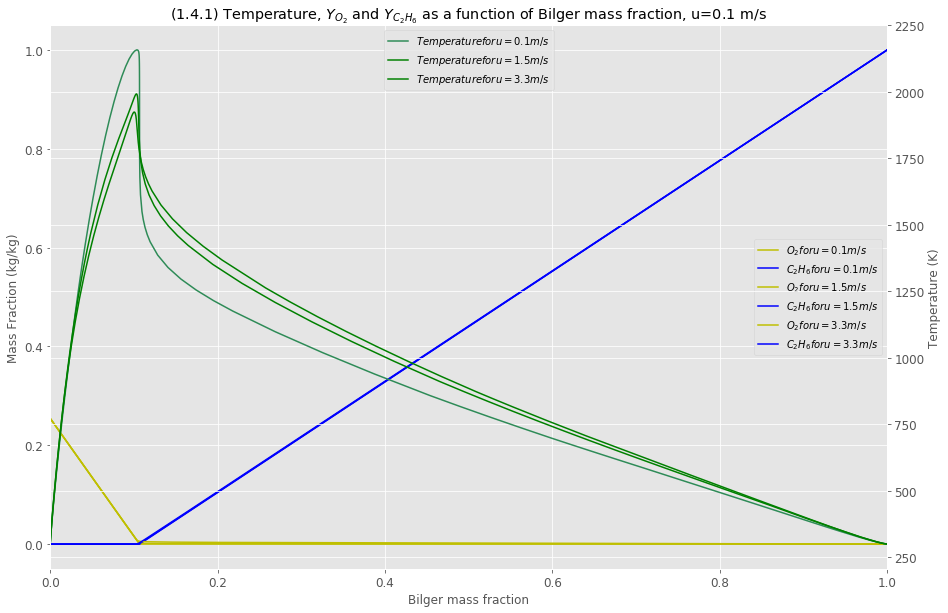

In [23]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (8,6)

plt.style.use('ggplot')
plt.style.use('seaborn-deep')

plt.rcParams['figure.autolayout'] = True

plt.clf()
fig, ax1 = plt.subplots(figsize=(15,10))
fig.set_tight_layout(False)
ax2 = ax1.twinx()
ax1.plot(Z_comb[0], Y_O2_comb[0],'y', label=r'$O_{2} for u=0.1m/s$')
ax1.plot(Z_comb[0], Y_C2H6_comb[0],'b', label=r'$C_{2}H_{6} for u=0.1m/s$')
ax2.plot(Z_comb[0], T_comb[0],'seagreen', label=r'$Temperature for u=0.1m/s$')
ax1.plot(Z_comb[1], Y_O2_comb[1],'y', label=r'$O_{2}for u=1.5 m/s$')
ax1.plot(Z_comb[1], Y_C2H6_comb[1],'b', label=r'$C_{2}H_{6} for u=1.5m/s$')
ax2.plot(Z_comb[1], T_comb[1],'g', label=r'$Temperature for u= 1.5 m/s$')
ax1.plot(Z_comb[2], Y_O2_comb[2],'y', label=r'$O_{2} for u=3.3m/s$')
ax1.plot(Z_comb[2], Y_C2H6_comb[2],'b', label=r'$C_{2}H_{6} for u=3.3 m/s$')
ax2.plot(Z_comb[2], T_comb[2],'g', label=r'$Temperature for u=3.3m/s$')

plt.title('(1.4.1) Temperature, $Y_{O_2}$ and $Y_{C_2H_6}$ as a function of Bilger mass fraction, u=0.1 m/s')
ax1.set_xlabel('Bilger mass fraction')
ax2.set_ylabel('Temperature (K)')
ax1.set_ylabel('Mass Fraction (kg/kg)')

ax1.set_xlim([0,1])
ax2.legend(loc=9)
ax1.legend(loc=5)

plt.xlim(xmin=0,xmax=1)

From the graph its seen that as the speed of the flow is increased, the flame temperature slightly decreases. This can be explained by the fact that increasing the flow speed reduces the residence time which does not allow the reaction to go to completion. Due to which , excess reactants are left behind which prevents further rise in flame temperature. As a result the thickness of the flame decreses as well. This results in a lot of reactant leakage which prevents the reaction to undergo completion resulting in leftover reactants, thus causing the maximum flame temperature to drop and the flame to become thinner. Furthermore, an increase in velocity also results in an increase in the local velocity gradient, which thus results in the decrease of the local strain rate. Theoretically, the maximum flame temperature is proportional to the inverse of the square root of the strain rate.

The temperature increases drastically, reaches a peak, and then drops steadily. The maximum temperature for a particular velocity is the Adiabatic flame temperature at that point, which occurs at its corresponding Bilger’s mixture fraction, which is called the Stoichiometric fraction $Z_{st}$. For all three cases, the maximum temperature occurs at roughly $Z$ = 0.1, thus an increase in velocity doesn’t affect the Bilger’s mixture fraction, but does drop the maximum flame temperature as explained above.

The mass fraction of reactants vs. $Z$ graphs shows as Bilger’s mixture fraction is increased initially, the mass fraction of $O_2$ decreases sharply for all three velocities until $Z$ reaches $Z_{st}$, which is roughly around 0.1. After this point, the mass fraction of $O_2$ decreases very gradually with a further increase in $Z$. This happens since until the stoichiometric ratio is reached, the consumption of oxygen is very rapid. Beyond this point, the consumption of oxygen slows down considerably. At higher speeds, greater mass fraction of oxygen is left behind because as speed is increased, the chances of reactant leakage increases as a result of which the greater mass fraction of the oxidizer is unused and the reaction is not able to go to completion.

As Bilger’s mixture fraction is increased initially, the mass fraction of $C_2H_6$ increases from o to $Z$ = 0.1 point for all three velocities as almost all of the fuel is consumed in the combustion process to form the flame. As $Z$ is increased past $Z$ = 0.1, the mass fraction of $C_2H_6$ increases almost linearly as there isn’t enough oxygen for the fuel to undergo combustion. This is because, at $Z$ = 0.1 all the reactants are used and the rest of the reaction is for the formation of the products which can be clearly seen from the graphs.

 ## BONUS QUESTION 

Again, with the same setup, we are asked to obtain the solution for four fuel composition;
o Fuel 1: Y(C2H6) = 1.00, Y(N2) = 0.00
o Fuel 2: Y(C2H6) = 0.75, Y(N2) = 0.25
o Fuel 3: Y(C2H6) = 0.50, Y(N2) = 0.50
o Fuel 4: Y(C2H6) = 0.25, Y(N2) = 0.75

We are also asked to draw three graphs 

Plot on one graph the temperature, T, as function of mixture fraction, Z for the four fuels composition. Plot on second graph the mass fraction of ethane, Y(C2H6), as function of mixture fraction, Z for the four fuels composition. Plot on second graph the mass fraction of oxygen, Y(O2), as function of mixture fraction, Z for the four fuels composition

In [25]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

P0    = ct.one_atm
T0    = 300.0

Y_O2_comb = []
Y_C2H6_comb = []
T_comb = []
Z_comb = []

fuelC = [1.0, 0.75, 0.5, 0.25]
fuelN = [0.0, 0.25, 0.5, 0.75]

for i in range(len(fuelC)):
    
    comp_a =  'O2:0.23, N2:0.77'
    comp_f =  'C2H6:{0}, N2:{1}'.format(fuelC[i],fuelN[i])
    
    u_air = 1.5

    mech  = 'gri30.cti'
    g_gri = ct.Solution(mech,'gri30_mix')
    g_gri.TPX    = T0, P0, comp_a
    air_density  = g_gri.density
    g_gri.TPX    = T0, P0, comp_f
    fuel_density = g_gri.density

    mdot_a = u_air*air_density
    mdot_f = np.sqrt((u_air**2)*air_density*fuel_density)

    initial_grid = 0.02*np.linspace(0,1,40) #m
    
    tol_ss = [1.0e-5, 1.0e-20]
    tol_ts = [5.0e-3, 1.0e-20]
    
    loglevel    = 1
    refine_grid = 1

    f = ct.CounterflowDiffusionFlame(g_gri, initial_grid)

    f.flame.set_steady_tolerances(default=tol_ss)
    f.flame.set_transient_tolerances(default=tol_ts)

    f.fuel_inlet.mdot     = mdot_f
    f.fuel_inlet.X        = comp_f
    f.fuel_inlet.T        = T0
    
    f.oxidizer_inlet.mdot = mdot_a
    f.oxidizer_inlet.X    = comp_a
    f.oxidizer_inlet.T    = T0

    f.set_initial_guess()

    f.solve(loglevel, refine_grid=False)

    f.energy_enabled = True
    f.set_refine_criteria(ratio=2, slope=0.2, curve=0.3, prune=0.1)
    f.solve(loglevel, refine_grid=refine_grid)

    grid  = f.grid
    T_sol = f.T
    Y_sol   = f.Y
    Y_C2H6in = Y_sol[nC2H6,0]
    Y_C2H6   = Y_sol[nC2H6]
    Y_O2in  = Y_sol[nO2,-1]
    Y_O2    = Y_sol[nO2]
    
    Zc1 = np.zeros((len(grid),1))
    Zh1 = np.zeros((len(grid),1))
    Zc  = np.zeros((len(grid),1))
    Zh  = np.zeros((len(grid),1))
    Zo  = np.zeros((len(grid),1))
    Z   = np.zeros((len(grid),1))
    
    m=1
    n=4
    nuO2=2
    
    Zc1 = MWc*Y_C2H6in/MWc2h6
    Zh1 = 4*MWh*Y_C2H6in/MWc2h6
    Zc  = MWc*Y_C2H6/MWc2h6
    Zh  = 4*MWh*Y_C2H6/MWc2h6
    Zo  = 2*MWo*Y_O2/MWo2
    a   = (Zc/(m*MWc))+(Zh/(n*MWh))+(2*(Y_O2in-Zo)/(nuO2*MWo2))
    b   = (Zc1/(m*MWc))+(Zh1/(n*MWh))+(2*Y_O2in/(nuO2*MWo2))
    Z   = a/b
    
    Y_O2_comb.append(np.asarray(Y_O2))
    Y_C2H6_comb.append(np.asarray(Y_C2H6))
    T_comb.append(np.asarray(T_sol))
    Z_comb.append(np.asarray(Z))


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.335e-06      7.216
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     2.281e-05      6.465
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.773e-05      6.106
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001096      5.935
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0006242      5.302
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00711      2.899
Attempt Newton solution of steady-state problem...    success.

Problem solved on [40] point grid(s).

..............................................................................
grid refinement disabled.

.....................................................................

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.611e-05       4.83
Attempt Newton solution of steady-state problem...    success.

Problem solved on [62] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2O NCO NH NH2 NH3 NO NO2 O O2 OH T 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [84] point grid(s).

................

Attempt Newton solution of steady-state problem...    success.

Problem solved on [121] point grid(s).

..............................................................................
no new points needed in flame

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.009e-06      6.408
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.123e-05      5.867
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003079      5.373
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003507      3.814
Attempt Newton solution of steady-state problem...    success.

Problem solved on [40] point grid(s).

..............................................................................
grid refinement disabled.

......................................................................

C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


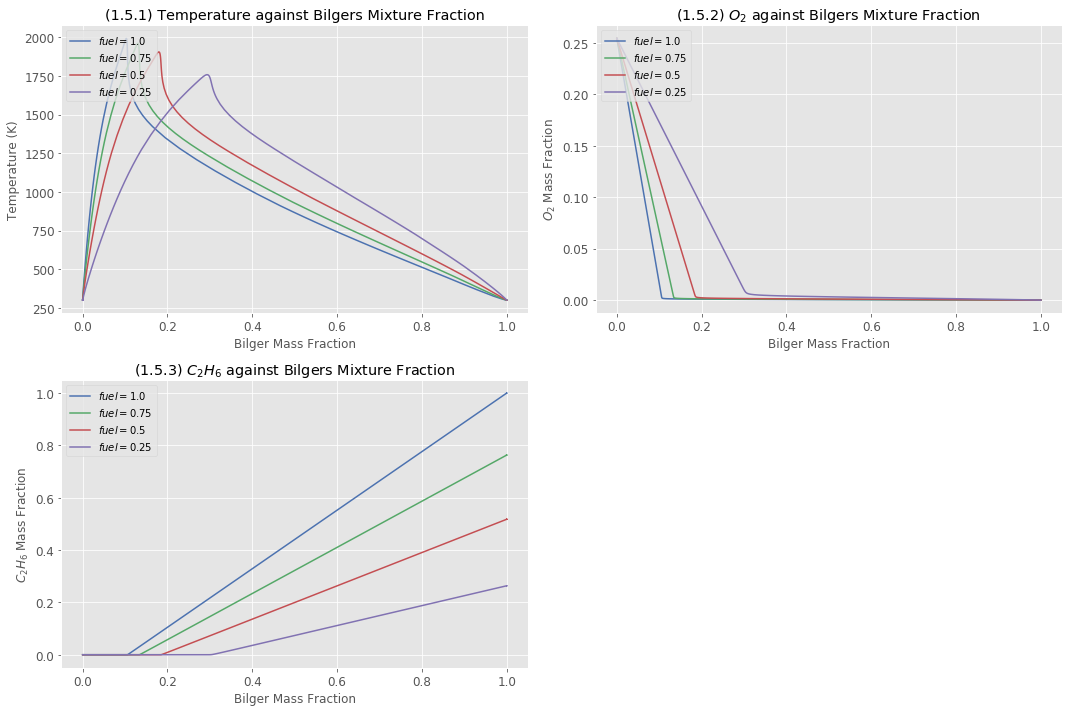

In [30]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.figsize'] = (8,6)

plt.style.use('ggplot')
plt.style.use('seaborn-deep')

plt.rcParams['figure.autolayout'] = True

fig, axes = plt.subplots(figsize=(15,10))
plt.clf()

plt.subplot(2, 2, 1)
plt.plot(Z_comb[0], T_comb[0], label=r'$fuel = 1.0$')
plt.plot(Z_comb[1], T_comb[1], label=r'$fuel = 0.75$')
plt.plot(Z_comb[2], T_comb[2], label=r'$fuel = 0.5$')
plt.plot(Z_comb[3], T_comb[3], label=r'$fuel = 0.25$')
plt.xlabel('Bilger Mass Fraction')
plt.ylabel('Temperature (K)')
plt.title('(1.5.1) Temperature against Bilgers Mixture Fraction')
plt.legend(['$fuel = 1.0$','$fuel = 0.75$','$fuel = 0.5$','$fuel = 0.25$'], loc=2)

plt.subplot(2, 2, 2)
plt.plot(Z_comb[0], Y_O2_comb[0], label=r'$fuel = 1.0$')
plt.plot(Z_comb[1], Y_O2_comb[1], label=r'$fuel = 0.75$')
plt.plot(Z_comb[2], Y_O2_comb[2], label=r'$fuel = 0.5$')
plt.plot(Z_comb[3], Y_O2_comb[3], label=r'$fuel = 0.25$')
plt.xlabel('Bilger Mass Fraction')
plt.ylabel('$O_2$ Mass Fraction')
plt.title('(1.5.2) $O_2$ against Bilgers Mixture Fraction')
plt.legend(['$fuel = 1.0$','$fuel = 0.75$','$fuel = 0.5$','$fuel = 0.25$'], loc=2)

plt.subplot(2, 2, 3)
plt.plot(Z_comb[0], Y_C2H6_comb[0], label=r'$fuel = 1.0$')
plt.plot(Z_comb[1], Y_C2H6_comb[1], label=r'$fuel = 0.75$')
plt.plot(Z_comb[2], Y_C2H6_comb[2], label=r'$fuel = 0.5$')
plt.plot(Z_comb[3], Y_C2H6_comb[3], label=r'$fuel = 0.25$')
plt.xlabel('Bilger Mass Fraction')
plt.ylabel('$C_2H_6$ Mass Fraction')
plt.title('(1.5.3) $C_2H_6$ against Bilgers Mixture Fraction')
plt.legend(['$fuel = 1.0$','$fuel = 0.75$','$fuel = 0.5$','$fuel = 0.25$'], loc=2)

# Part 2 – Un-stretched, Freely-propagating, Laminar Premixed Flame

## Introduction 

In the initial stage of the design of a new combustion system, a few key parameters are evaluated
with simple correlations or calculations. In previous projects we have used O-D reactors whereas in this
project we will use a 1D reactor, namely, the laminar freely propagating flame.
In this part of the project, we will investigate different aspects of a laminar premixed flame and
how they can be used to make basic calculation related to combustion systems. For example, pollutant
emissions (NOx and CO), can be evaluated as function of combustor residence time. Effect of richness
and pressure can also be estimated with this approach.

## 2.1 a - Conversion of spatial coordinates to temporal coordinates

In [36]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

To = 300
Po = 101325

gas = ct.Solution('gri30.cti')

gas.set_equivalence_ratio(0.7, 'CH4', {'O2':2.0, 'N2':7.52})
gas.TP = To, Po

initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3

flame = ct.FreeFlame(gas, initial_grid)

flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)

loglevel = 1

flame.solve(loglevel=loglevel, auto=True)
Su0 = flame.u[0]
print("Flame Speed is: {:.2f} cm/s".format(Su0*100))


************ Solving on 6 point grid with energy equation enabled ************

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.407e-05      3.851
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001642       3.61
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04209      2.137
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02663      2.149
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
grid refinement disabled.

******************** Solving with grid refinement enabled ********************

..............................................................................
Attempt Newton solution of steady-state probl

Attempt Newton solution of steady-state problem...    success.

Problem solved on [130] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 42 44 45 46 47 61 62 63 65 66 67 68 69 70 71 72 73 74 75 76 77 78 
    to resolve C2H2 C2H5 C3H8 CH2 CH2CO CH3 CH3CHO CH3O HCO point 42 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [152] point grid(s).

..............................................................................
no new points needed in flame
Flame Speed is: 19.38 cm/s


In [38]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

def time_calculator(grid_size, grid_size1, local_velocity, local_velocity1):
    delta_t = (grid_size1-grid_size)/(local_velocity)
    return delta_t

velocity_flame = flame.u
grid_spacing = flame.grid
delta_t=np.zeros(len(velocity_flame))
add=0
delta_t[0] =0
for i in range(len(grid_spacing)-1):
    delta_t[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
    add = delta_t[i+1]

## 2.1 (b) Mass Fraction VS Time & Temperature VS Heat Release VS Time

The max heat release occurs at 0.037679 s


(-0.01, 0.12)

C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


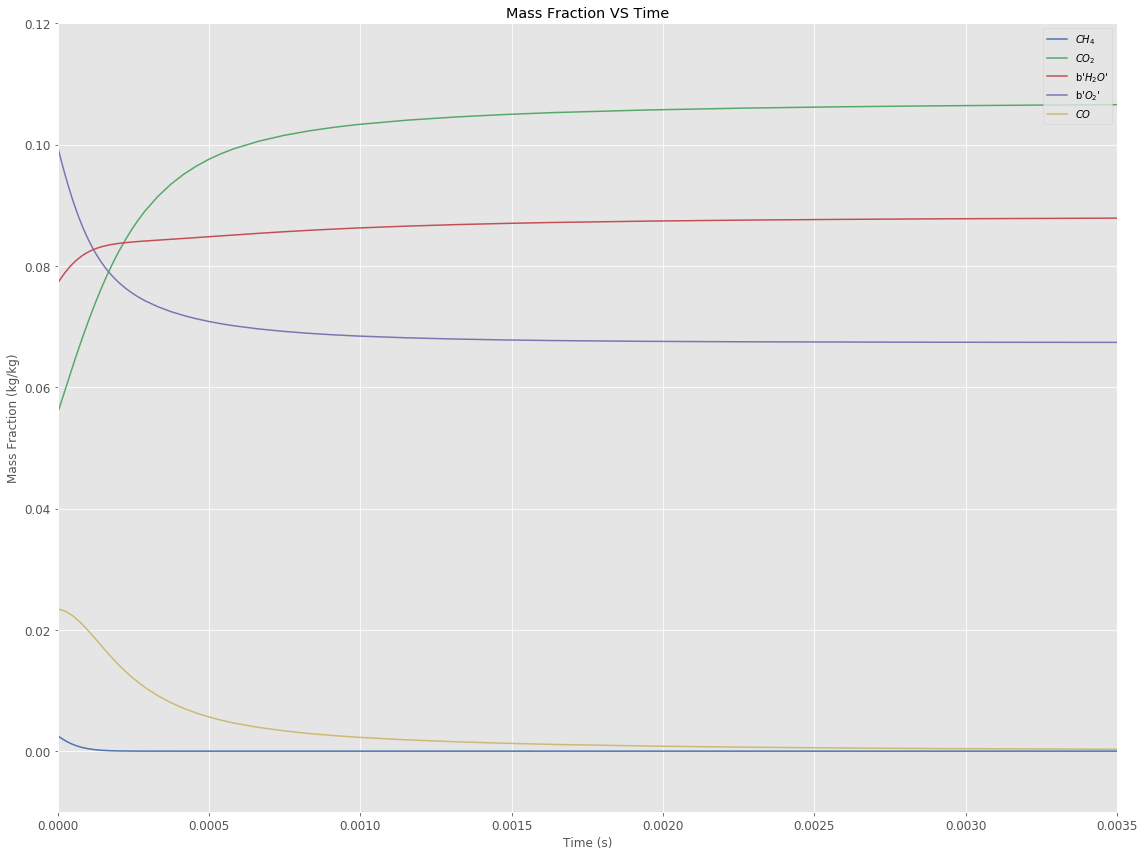

In [39]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

Y_CH4 = flame.Y[13]
Y_CO2 = flame.Y[15]
Y_H2O = flame.Y[5]

Y_O2 = flame.Y[3]
Y_CO = flame.Y[14]
Heat_Release = flame.heat_release_rate
Heat_max = max(flame.heat_release_rate)
T_flame=flame.T
T_max = max(flame.T)

i=0
for i in range(len(grid_spacing)):
    if Heat_Release[i]-Heat_max==0:
        delta_tzero=delta_t[i]
        break

print('The max heat release occurs at %5.6f s' %delta_tzero)        
        
fig, ax1 = plt.subplots(figsize=(16,12))
plt.plot(delta_t - delta_tzero, Y_CH4, label=r'$CH_{4}$')
plt.plot(delta_t - delta_tzero, Y_CO2, label=r'$CO_{2}$')
plt.plot(delta_t - delta_tzero, Y_H2O, label=b'$H_{2}O$')
plt.plot(delta_t - delta_tzero, Y_O2, label=b'$O_2$')
plt.plot(delta_t - delta_tzero, Y_CO, label=r'$CO$')
plt.grid(True)

plt.title('Mass Fraction VS Time')
plt.xlabel('Time (s)')
plt.ylabel('Mass Fraction (kg/kg)')

plt.legend(loc=1)

plt.xlim([0.00, 0.0035])
plt.ylim([-0.01, 0.12])

(0.0, 0.01)

C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


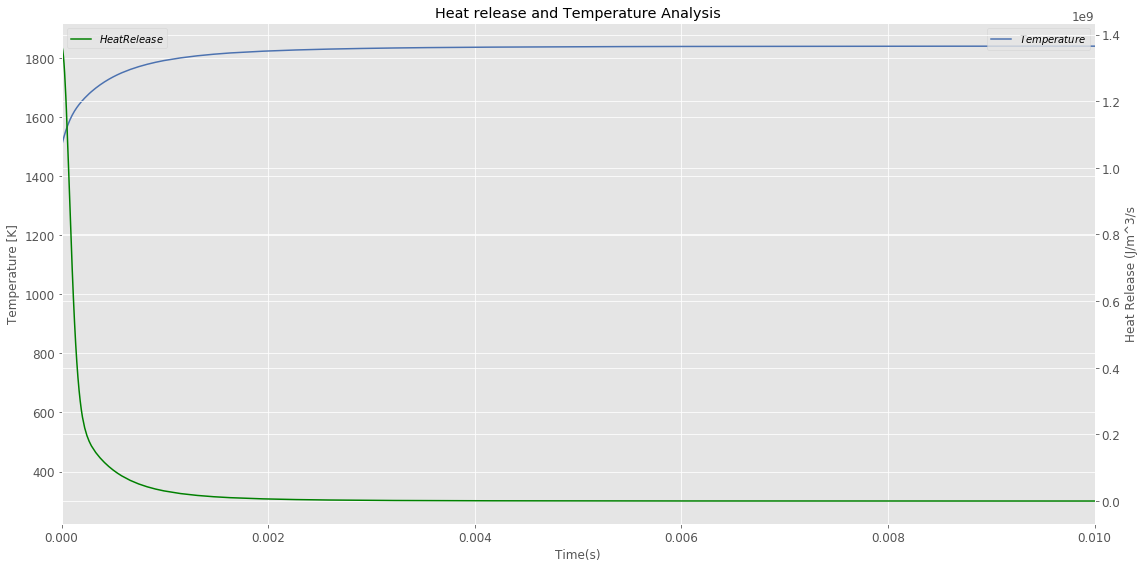

In [40]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(16,8))
ax2 = ax1.twinx()
ax1.plot(delta_t - delta_tzero, T_flame, label=r'$Temperature$')
ax2.plot(delta_t - delta_tzero, Heat_Release, label=r'$Heat Release$', color='green')

plt.title('Heat release and Temperature Analysis')
ax1.set_xlabel('Time(s)')
ax2.set_ylabel('Heat Release (J/m^3/s')
ax1.set_ylabel('Temperature [K]')

ax2.legend(['$Heat Release$'],loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)

plt.xlim(xmin=0.0,xmax=0.01)

## 2.1 (c) Reaction Rate VS Time

(0.0, 0.002)

C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


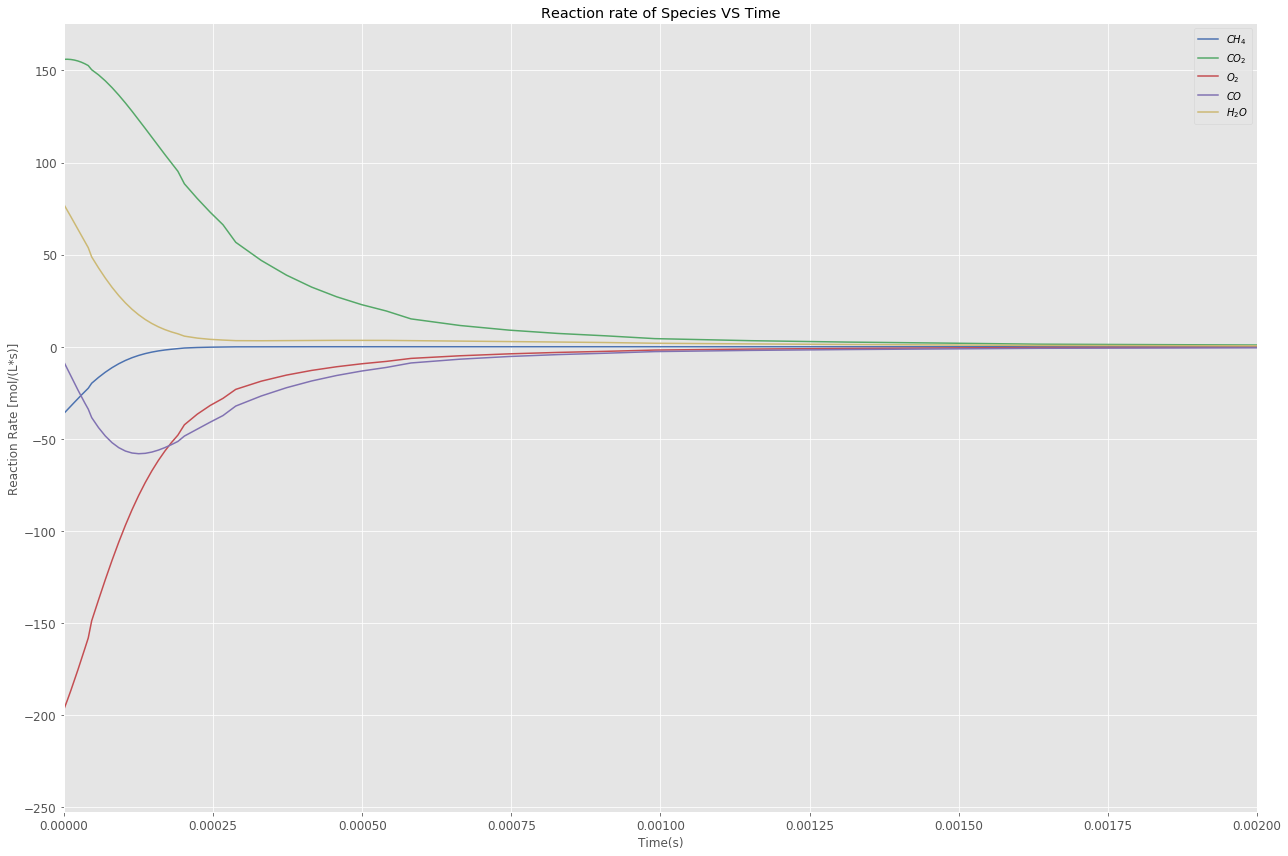

In [41]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

Reactionrate_CH4 = np.zeros(len(grid_spacing))
Reactionrate_CO2 = np.zeros(len(grid_spacing))
Reactionrate_H2O = np.zeros(len(grid_spacing))
Reactionrate_O2 = np.zeros(len(grid_spacing))
Reactionrate_CO = np.zeros(len(grid_spacing))

i=0
for i in range (len(grid_spacing)-1):
    Reactionrate_CO2[i] = (Y_CO2[i+1]-Y_CO2[i])/(delta_t[i+1]-delta_t[i])
    Reactionrate_CH4[i] = (Y_CH4[i+1]-Y_CH4[i])/(delta_t[i+1]-delta_t[i])
    Reactionrate_O2[i] = (Y_O2[i+1]-Y_O2[i])/(delta_t[i+1]-delta_t[i])
    Reactionrate_H2O[i] = (Y_H2O[i+1]-Y_H2O[i])/(delta_t[i+1]-delta_t[i])
    Reactionrate_CO[i] = (Y_CO[i+1]-Y_CO[i])/(delta_t[i+1]-delta_t[i])
    
fig = plt.figure(figsize=(18,12))
plt.title('Reaction rate of Species VS Time')
plt.xlabel('Time(s)')
plt.ylabel('Reaction Rate [mol/(L*s)]')
plt.plot(delta_t-delta_tzero, Reactionrate_CH4, label=r'$CH_{4}$')
plt.plot(delta_t-delta_tzero, Reactionrate_CO2, label=r'$CO_{2}$')
plt.plot(delta_t-delta_tzero, Reactionrate_O2, label=r'$O_2$')
plt.plot(delta_t-delta_tzero, Reactionrate_CO, label=r'$CO$')
plt.plot(delta_t-delta_tzero, Reactionrate_H2O, label=r'$H_{2}O$')
plt.legend(loc=1)
plt.grid(True)

plt.xlim(xmin=0.0,xmax=0.002)

The above graphs, show how the mole fractions for various species vary with our derived time coordinate. It can be seen that the two reactants $CH_4$ and $O_2$ decreases with time. It can also be seen that the methane molcules go to zero as it is a lean mixture, which means some $O_2$ molecules will remain. This perfectly sums up our analysis. In the products side $CO_2$ and $H_{2}O$ increase with time, while $CO$ increas, reaches a peak and then decreases to zero. This may be due to this being a lean combustion meaning the $CO$ molecules react with unburnt $O2$ molecules to form $CO_2$.

In terms of reaction rates we can see that the $O_2$ has the highest initial absolute value of the reaction rate which is due to oxygen interacting with multiple other species. Due to this it is also naturally reacting mch faster. In the product side, the rate of formation of $CO_2$ is also faster to that of $H_2O$. Eventually the reaction rates for all species eventually goes to zero. 

The temperature and heat release graph shows that the amount of heat released reaches a peak and then  gradually comes down to zero after completion of combustion. This is because combustion is an exothermic process. While in the case of temperature, the temperature increases until it reaches a maximum value and eventually plateaus at that the value at the end of the reaction.




## 2.1 (d) Repeat simulation with $\phi$=0.600, 0.625, 0.650, 0.675, and 0.700

In [42]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

phi = np.array([0.600, 0.625, 0.650, 0.675, 0.700])

for i in range(len(phi)):
    To = 300
    Po = 101325

    gas = ct.Solution('gri30.cti')
    
    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, N2:7.52'%phi[i]
    initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3
    flame = ct.FreeFlame(gas, initial_grid)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    flame.solve(loglevel=loglevel);
    Su0 = flame.u[0]
    grid_spacing = flame.grid
    velocity_flame = flame.u
    if phi[i]==0.600:
        B1=np.zeros((len(grid_spacing),4))
        delta_t1=np.zeros(len(grid_spacing))
        add=0
        delta_t1[0] =0
        for i in range(len(grid_spacing)):
            B1[:,0]=flame.X[14]
            B1[:,1]=flame.X[35]
            B1[:,2]=flame.heat_release_rate
            B1[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t1[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t1[i+1]
        grid1=(len(grid_spacing))
        continue  
    if phi[i]==0.625:                    
        B2=np.zeros((len(grid_spacing),4))
        delta_t2=np.zeros(len(grid_spacing))
        add=0
        delta_t2[0] =0
        for j in range(len(grid_spacing)):
            B2[:,0]=flame.X[14]
            B2[:,1]=flame.X[35]
            B2[:,2]=flame.heat_release_rate
            B2[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t2[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t2[i+1]
        grid2=(len(grid_spacing))
        continue   
    if phi[i]==0.650:
        B3=np.zeros((len(grid_spacing),4))
        delta_t3=np.zeros(len(grid_spacing))
        add=0
        delta_t3[0] =0
        for k in range(len(grid_spacing)):
            B3[:,0]=flame.X[14]
            B3[:,1]=flame.X[35]
            B3[:,2]=flame.heat_release_rate
            B3[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t3[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t3[i+1]
        grid3=(len(grid_spacing))
        continue
    if phi[i]==0.675:
        delta_t4=np.zeros(len(grid_spacing))
        B4=np.zeros((len(grid_spacing),4))
        add=0
        delta_t4[0] =0
        for l in range(len(grid_spacing)):
            B4[:,0]=flame.X[14]
            B4[:,1]=flame.X[35]
            B4[:,2]=flame.heat_release_rate
            B4[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t4[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t4[i+1]
        grid4=(len(grid_spacing))
        continue
        
    if phi[i]==0.700:
        delta_t5=np.zeros(len(grid_spacing))
        B5=np.zeros((len(grid_spacing),4))
        add=0
        delta_t5[0] =0
        for m in range(len(grid_spacing)):
            B5[:,0]=flame.X[14]
            B5[:,1]=flame.X[35]
            B5[:,2]=flame.heat_release_rate
            B5[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t5[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t5[i+1]
        grid5=(len(grid_spacing))
        continue
    
print(delta_t1)  
print(delta_t2)
print(delta_t3)
print(delta_t4)
print(delta_t5)


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      3.464
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004379      3.396
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.0187      2.246
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.03551      2.089
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H4 C2H6 C3H8 CH2 CH2CO CH2O CH3 CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T point 1 point 3 point 4 u 
####

Take 10 timesteps        0.0187      2.259
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04735      2.054
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H4 C2H6 C3H8 CH2 CH2CO CH2O CH2OH CH3 CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T point 1 point 3 point 4 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      3.864
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps    

Take 10 timesteps      0.009352      2.281
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.05326      2.076
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H4 C2H6 C3H8 CH2 CH2CO CH2O CH2OH CH3 CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T point 1 point 3 point 4 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      3.919
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps    


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.543e-05      3.783
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002189      3.573
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.03741      2.246
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02367       2.22
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.6067    -0.5101
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H4 C2H5 C2H6 C3H8 CH2 CH2CO C

Attempt Newton solution of steady-state problem...    success.

Problem solved on [146] point grid(s).

..............................................................................
no new points needed in flame

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.407e-05      3.851
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001642       3.61
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04209      2.137
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02663      2.149
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in fl

Attempt Newton solution of steady-state problem...    success.

Problem solved on [152] point grid(s).

..............................................................................
no new points needed in flame
[0.         0.00292447 0.00584893 0.01242897 0.01900898 0.0321688
 0.0387478  0.0453243  0.04860699 0.05187941 0.05512301 0.05670537
 0.05747463 0.05785065 0.0582212  0.05838304 0.05854348 0.05886134
 0.05948384 0.06007557 0.06035342 0.06062134 0.06087879 0.06112536
 0.06124307 0.06135796 0.06147001 0.06157921 0.06168559 0.06178914
 0.06188989 0.06198787 0.06208311 0.06217567 0.06226558 0.06230923
 0.06235225 0.06244763 0.06253987 0.06262907 0.06271531 0.0627987
 0.06287933 0.0629573  0.06303269 0.06310562 0.06317617 0.06324444
 0.06331052 0.06337451 0.06343648 0.06349654 0.06355476 0.063583
 0.06361082 0.06363823 0.06366524 0.06369186 0.06371811 0.06374399
 0.06376951 0.06379469 0.06381953 0.06384405 0.06386827 0.06389218
 0.06391581 0.06393916 0.06396224 0.06398508 0.0640076

In [43]:
i=0;j=0;k=0;l=0;m=0
for i in range(grid1):
    if B1[i,2]-max(B1[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t1[i],B1[i,2]))
        break
for j in range(grid2):
    if B2[j,2]-max(B2[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t2[j],B2[j,2]))
        break
for k in range(grid3):
    if B3[k,2]-max(B3[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t3[k],B3[k,2]))
        break
for l in range(grid4):
    if B4[l,2]-max(B4[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t4[l],B4[l,2]))
        break
for m in range(grid5):
    if B5[m,2]-max(B5[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t5[m],B5[m,2]))
        break

The max heat release rate occurs at time 0.064139s and is = 548650160.802868 J/m^3-s
The max heat release rate occurs at time 0.054861s and is = 715246325.998872 J/m^3-s
The max heat release rate occurs at time 0.047725s and is = 907691610.842417 J/m^3-s
The max heat release rate occurs at time 0.042131s and is = 1125476488.171402 J/m^3-s
The max heat release rate occurs at time 0.037679s and is = 1365055309.868709 J/m^3-s


C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


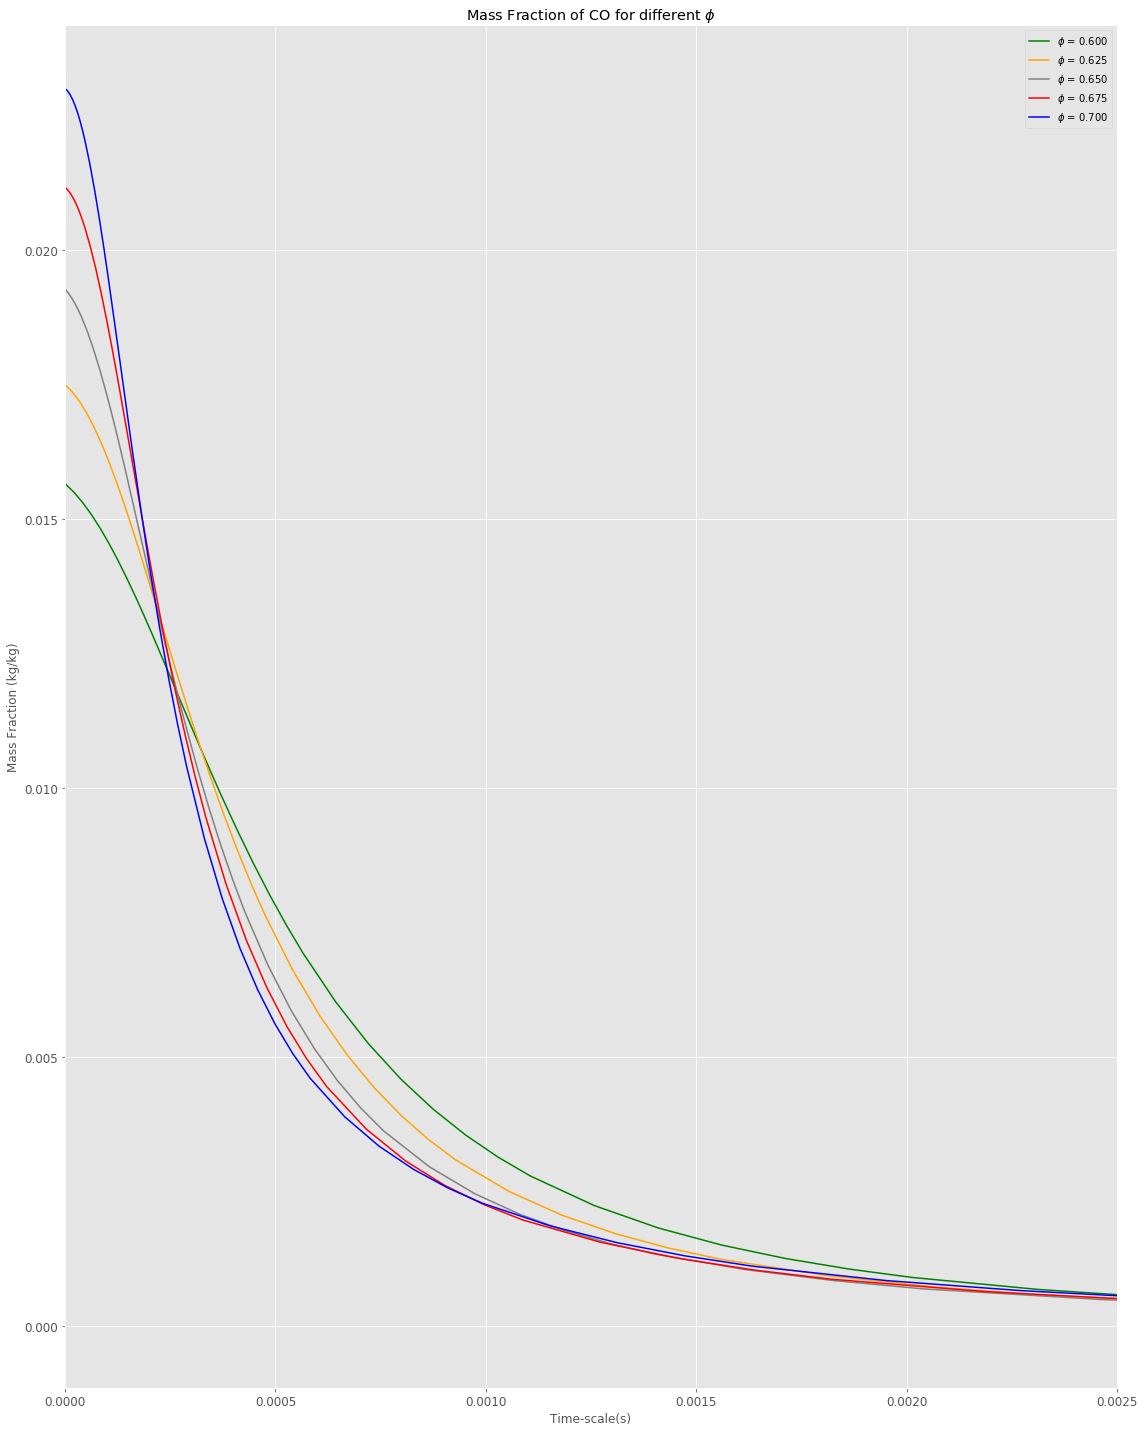

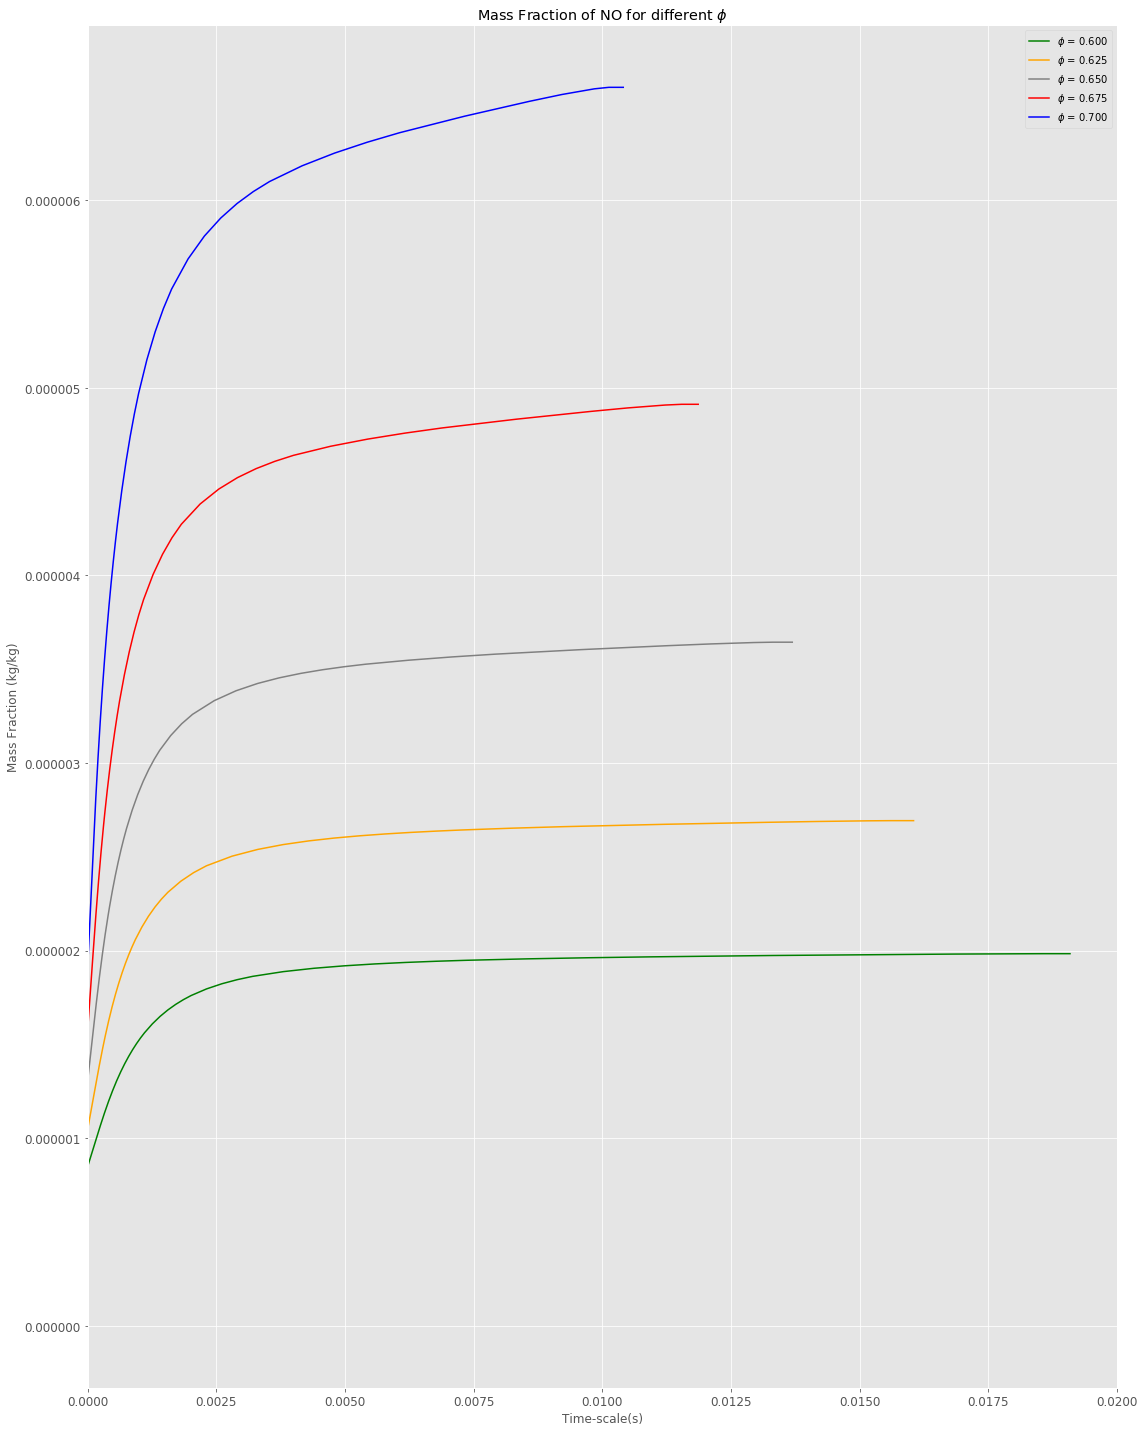

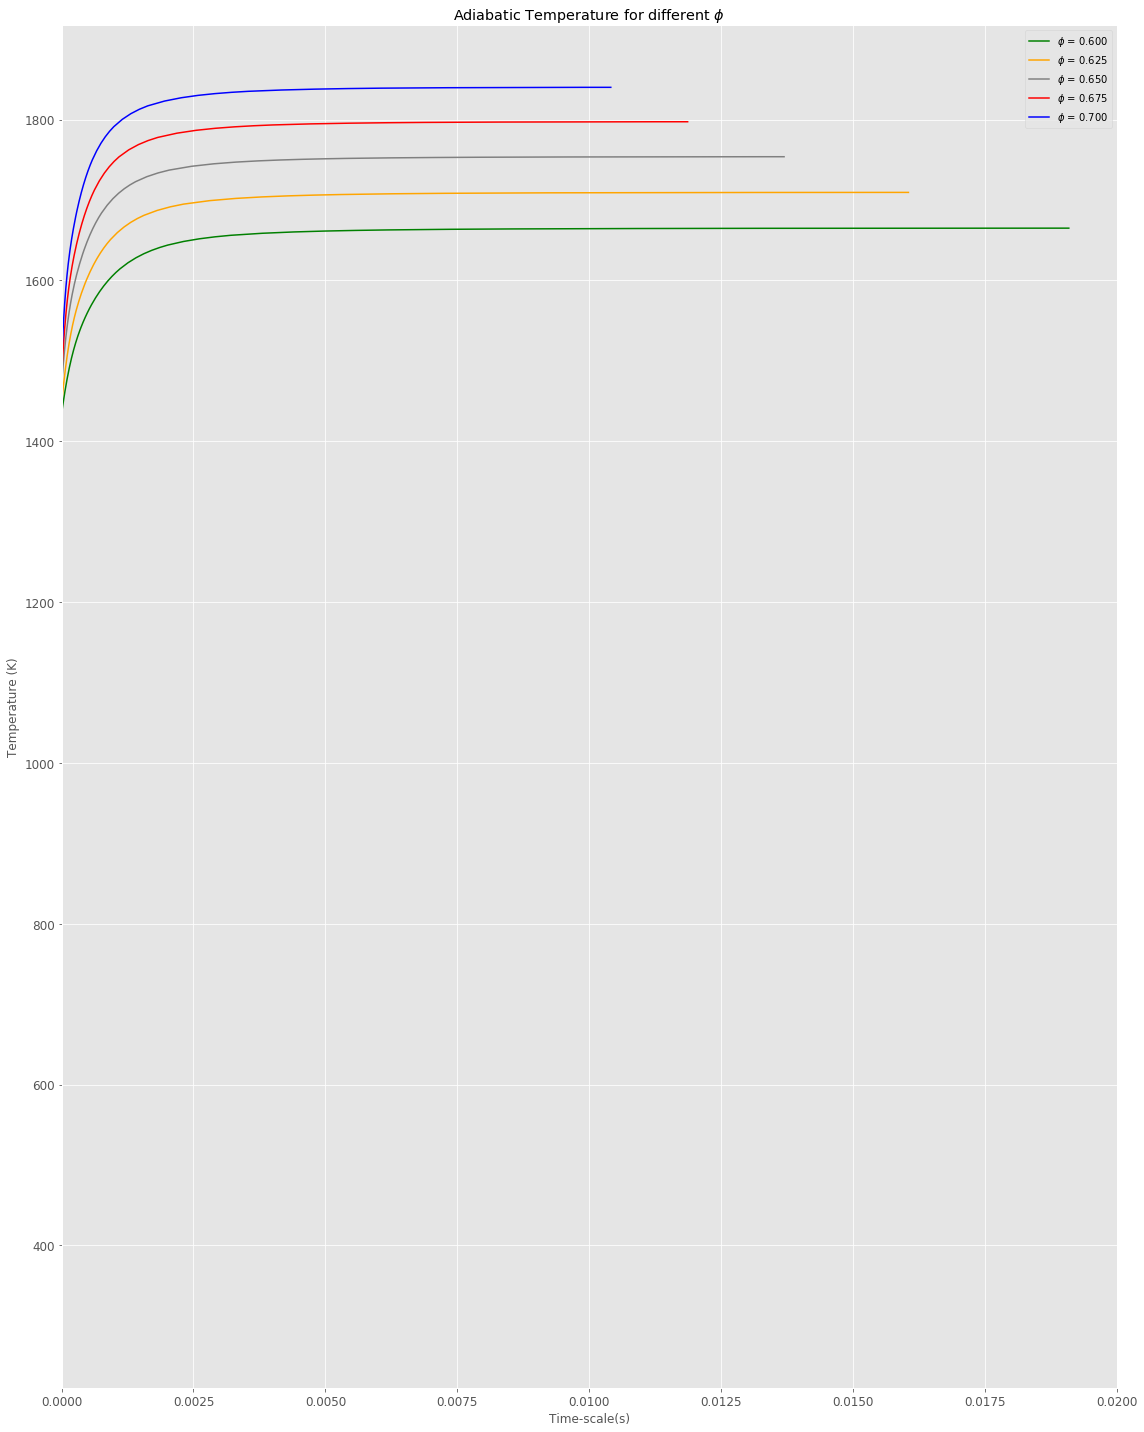

In [44]:
fig= plt.figure(figsize=(16,20))
plt.plot(delta_t1-0.064139, B1[:,0], color='green', label=r'$\phi$ = 0.600')
plt.plot(delta_t2-0.054861, B2[:,0], color='orange', label=r'$\phi$ = 0.625')
plt.plot(delta_t3-0.047725, B3[:,0], color='grey', label=r'$\phi$ = 0.650')
plt.plot(delta_t4-0.042131, B4[:,0], color='red', label=r'$\phi$ = 0.675')
plt.plot(delta_t5-0.037679, B5[:,0], color='blue', label=r'$\phi$ = 0.700')
plt.title('Mass Fraction of CO for different $\phi$')
plt.xlabel('Time-scale(s)')
plt.ylabel('Mass Fraction (kg/kg)')
plt.legend(loc=1)
plt.xlim([0, 0.0025])
plt.grid(True)

fig= plt.figure(figsize=(16,20))
plt.plot(delta_t1-0.064139, B1[:,1], color='green', label=r'$\phi$ = 0.600')
plt.plot(delta_t2-0.054861, B2[:,1], color='orange', label=r'$\phi$ = 0.625')
plt.plot(delta_t3-0.047725, B3[:,1], color='grey', label=r'$\phi$ = 0.650')
plt.plot(delta_t4-0.042131, B4[:,1], color='red', label=r'$\phi$ = 0.675')
plt.plot(delta_t5-0.037679, B5[:,1], color='blue', label=r'$\phi$ = 0.700')
plt.title('Mass Fraction of NO for different $\phi$')
plt.xlabel('Time-scale(s)')
plt.ylabel('Mass Fraction (kg/kg)')
plt.legend(loc=1)
plt.xlim([0, 0.02])
plt.grid(True)

fig= plt.figure(figsize=(16,20))
plt.plot(delta_t1-0.064139, B1[:,3], color='green', label=r'$\phi$ = 0.600')
plt.plot(delta_t2-0.054861, B2[:,3], color='orange', label=r'$\phi$ = 0.625')
plt.plot(delta_t3-0.047725, B3[:,3], color='grey', label=r'$\phi$ = 0.650')
plt.plot(delta_t4-0.042131, B4[:,3], color='red', label=r'$\phi$ = 0.675')
plt.plot(delta_t5-0.037679, B5[:,3], color='blue', label=r'$\phi$ = 0.700')
plt.title('Adiabatic Temperature for different $\phi$')
plt.xlabel('Time-scale(s)')
plt.ylabel('Temperature (K)')
plt.legend(loc=1)
plt.xlim([0, 0.02])
plt.grid(True)

It can be seen, that  the concentration of $CO$ produced is initially higher for higher equivalence ratios. However, after some time a general trend of, the higher the equivalence ratio the lower the $CO$ is observed. This can be due to teh decrease in size of the reaction zone which would lead to lower number of reactions and hence the formation of $CO$ should decrease eventually going to zero as the equivalence ratio reaches 1.

For the $NO$ graph, it can be seen that the production of $NO$ increases for higher equivalence ratio. We can that the temperature is also increasing with higher equivalence ratio which corresponds with the $NO$ formation. This is due to the strong triple covalent bond of N2 requiring higher value of temperatures , whcih means more NO is formed. Also, higher equivalence ratio in the lean mixture regions means the laminar flame speed is increasing leading to low residence time in the reaction zone which makes sense as for higher values we can see the temperature and in turn the mass fraction coming to a stop meaning the system has completely reacted at a faster speed.

## 2.1 (e) Laminar flame speed ($S_L$) as function of the equivalence ratio $\phi$=0.4 to 1.4 in steps of 0.20

In [45]:
def flame_speed_calculator(phi):
    To = 300
    Po = 101325

    gas = ct.Solution('gri30.cti')

    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, N2:7.52'%phi
    initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3
    flame = ct.FreeFlame(gas, initial_grid) 
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    flame.solve(loglevel=loglevel);
    Su0 = flame.u[0]
    print("Flame Speed is: {:.2f} cm/s".format(Su0*100))
    return (Su0*100)

phi = np.linspace(0.4,1.4,6)
flame_speedN2 = np.zeros(len(phi))
for i in range(len(phi)):
    flame_speedN2[i]=flame_speed_calculator(phi[i])


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.845
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002189      3.358
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.05611      1.765
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.6392     0.4459
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H2 C2H4 C2H5 C2H6 CH2CO CH2O CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HO2 N2 N2O NO NO2 O O2 OH T point 1 point 3 point 4 u 
#

Take 10 timesteps     0.0002563      4.488
Attempt Newton solution of steady-state problem...    success.

Problem solved on [35] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 7 8 9 14 15 16 17 18 19 20 21 22 23 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCO HO2 N2 N2O NO NO2 O O2 OH T point 17 point 8 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      5.302
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004379      3.577
Attempt Newton soluti

Take 10 timesteps     0.0001709       4.54
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.123e-05       5.29
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.742e-05      5.052
Attempt Newton solution of steady-state problem...    success.

Problem solved on [49] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 12 21 22 23 24 25 26 27 28 29 30 31 32 33 
    to resolve C C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCN HCNO HCO HNCO HO2 N N2 N2O NCO NO NO2 O O2 OH T point 12 point 29 u 
##############################################################################

..............................................................................

Take 10 timesteps     2.136e-05       6.32
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.123e-05      5.223
Attempt Newton solution of steady-state problem...    success.

Problem solved on [34] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 3 8 9 10 11 12 13 14 15 16 17 18 19 20 21 29 
    to resolve C C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T point 18 point 29 point 3 point 9 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 1

Take 10 timesteps     5.695e-05      6.313
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.082e-05      5.456
Attempt Newton solution of steady-state problem...    success.

Problem solved on [22] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 3 4 5 6 7 8 9 10 11 12 13 14 18 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T point 11 point 18 point 3 point 6 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Tak

Take 10 timesteps     0.0001709      5.567
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0004865      3.944
Attempt Newton solution of steady-state problem...    success.

Problem solved on [13] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 1 2 3 4 5 6 7 8 9 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH CH2 CH2(S) CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T point 2 point 3 point 6 point 9 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563

In [46]:
for i in range(len(phi)):
    print('The flame speed at equivalence ratio %5.6f is equal to : %5.6f cm/s'%(phi[i],flame_speedN2[i]))

The flame speed at equivalence ratio 0.400000 is equal to : 1.039659 cm/s
The flame speed at equivalence ratio 0.600000 is equal to : 11.398089 cm/s
The flame speed at equivalence ratio 0.800000 is equal to : 27.217402 cm/s
The flame speed at equivalence ratio 1.000000 is equal to : 37.791657 cm/s
The flame speed at equivalence ratio 1.200000 is equal to : 33.427991 cm/s
The flame speed at equivalence ratio 1.400000 is equal to : 13.818723 cm/s


## 2.1 (f) Redo the above simulation but replacing $N_2$ in the air with $CO_2$ and plot the two set of results on one graph and explain your results

In [48]:
def flame_speed_calculator(phi):
    To = 300
    Po = 101325

    gas = ct.Solution('gri30.cti')

    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, CO2:7.52'%phi
    width = 0.4
    flame = ct.FreeFlame(gas, width=width) 
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    flame.solve(loglevel=loglevel);
    Su0 = flame.u[0]
    print("Flame Speed is: {:.2f} cm/s".format(Su0*100))
    return (Su0*100)

phi = np.linspace(0.4,1.4,6)
flame_speedCO2 = np.zeros(len(phi))
for i in range(len(phi)):
    flame_speedCO2[i]=flame_speed_calculator(phi[i])


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      1.547
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.006568      1.544
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.07482      1.255
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1.278     0.7532
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         21.84   -0.02675
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         6.911     0.2748
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         118.1    -0.8559
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         37.36     -1.042
Attempt Newton solution of steady-state problem...    failure. 


Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.547
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009853      2.578
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.2525      1.644
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps         1.918     0.5253
Attempt Newton solution of steady-state problem...    success.

Problem solved on [39] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 12 13 14 15 16 17 18 19 20 21 22 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2CHO CH2CO CH2O CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HO2 O O2 OH T u 
##############################################################################

.....

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      4.163
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.004379      3.317
Attempt Newton solution of steady-state problem...    success.

Problem solved on [29] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 8 9 10 11 12 13 14 15 16 20 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 O O2 OH T point 20 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002563      4.005
Attempt Newton 

Take 10 timesteps      0.006568      2.974
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001559      4.359
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008323      4.346
Attempt Newton solution of steady-state problem...    success.

Problem solved on [15] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 3 4 5 6 7 8 12 
    to resolve C2H2 C2H4 C2H6 CH2 CH2CO CH2O CH2OH CH3 CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HO2 O O2 OH T point 12 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001709      3.597
Attempt Newto

Attempt Newton solution of steady-state problem...    success.

Problem solved on [133] point grid(s).

..............................................................................
no new points needed in flame
Flame Speed is: 3.53 cm/s

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      2.351
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009853      1.469
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1263      1.362
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002497      4.374
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001317      5.123
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.00225      2.838
Attempt Newton solution of steady-state

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.009853      2.223
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1683      1.616
Attempt Newton solution of steady-state problem...    success.

Problem solved on [69] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [87] poi

Attempt Newton solution of steady-state problem...    success.

Problem solved on [80] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2CO CH2O CH3 CH3CHO CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HO2 O O2 OH T u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [100] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points

In [49]:
for i in range(len(phi)):
    print('The flame speed at equivalence ratio %5.6f is equal to : %5.6f cm/s'%(phi[i],flame_speedCO2[i]))

The flame speed at equivalence ratio 0.400000 is equal to : 0.009945 cm/s
The flame speed at equivalence ratio 0.600000 is equal to : 0.736952 cm/s
The flame speed at equivalence ratio 0.800000 is equal to : 2.396337 cm/s
The flame speed at equivalence ratio 1.000000 is equal to : 3.527039 cm/s
The flame speed at equivalence ratio 1.200000 is equal to : 2.221404 cm/s
The flame speed at equivalence ratio 1.400000 is equal to : 1.156855 cm/s


C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


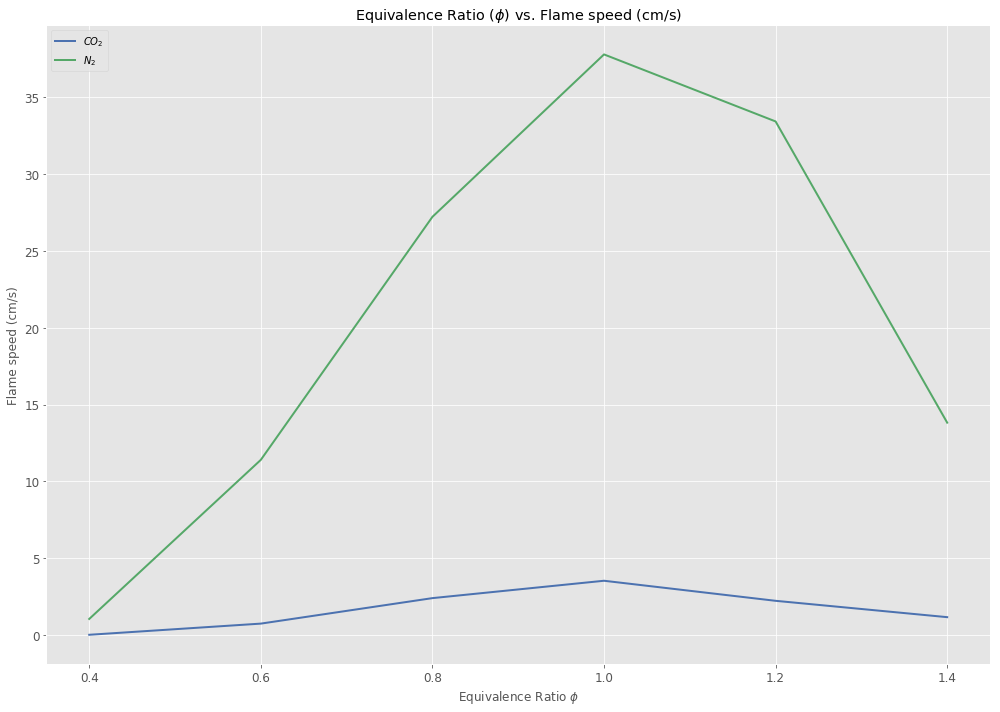

In [50]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(phi, flame_speedCO2, label ='$CO_2$',lw=2)
ax.plot(phi, flame_speedN2, label ='$N_2$',lw=2)
ax.legend(loc=2);
ax.set_xlabel('Equivalence Ratio $\phi$')
ax.set_ylabel('Flame speed (cm/s)')
ax.grid(True)
ax.set_title('Equivalence Ratio ($\phi$) vs. Flame speed (cm/s)');

We would expect flame speeds to be a maximum at a slightly rich mixture and fall off on either side, since the primary effect of equivalence ratio on flame speed for similar fuels is a result of how this parameter affects flame temperatures 

We learn that the laminar flame speed are higher by a significant amount for the $N_2$ environment flame as compared to $CO_2$ environment flame. This can be attributed to the thermal diffusivity of $N_2$ and $CO_2$ respectively. The thermal diffusivity is given by: 

$$\mathrm{\alpha = {k\over {\rho*c_p}}}$$

where, $k$ is the thermal conductivity, $\rho$ is the density and $c_p$ is the specific heat per unit mass at constant pressure.

Since $N_2$ has a lower molecular mass, the thermal conductivity  would be higher. In addition, we see that the specific heat values for $N_2$ are much lower than that of $CO_2$ (lower thermal diffusivity). The only other factors that actually could have had an impact is the mass diffusivity but this is rather similar since the number of moles that are transferred remains relatively constant along with a diffusion constant which are in the same ball park for both $N_2$ and $CO_2$. 

## 2.1 (g) For $T_{ini}$ = 700K and $\phi$=0.6, calculate the laminar flame speed ($S_L$) as function of pressure for $P_{ini}$ = 1, 2, 4, 8, 16 atm

In [51]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

P_ini = np.array([1, 2, 4, 8, 16])
flamespeed_P_ini = np.zeros(len(P_ini))

for i in range(len(P_ini)):
    To = 700
    Po = 101325*P_ini[i]

    gas = ct.Solution('gri30.cti')
    
    gas.TPX = To, Po, 'CH4:0.6, O2:2, N2:7.52'
    initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3
    flame = ct.FreeFlame(gas, initial_grid)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    flame.solve(loglevel=loglevel);
    Su0 = flame.u[0]
    grid_spacing = flame.grid
    velocity_flame = flame.u
    flamespeed_P_ini[i] = Su0*100
    
    if P_ini[i]==1:
        B1=np.zeros((len(grid_spacing),4))
        delta_t1=np.zeros(len(grid_spacing))
        add=0
        delta_t1[0] =0
        for i in range(len(grid_spacing)):
            B1[:,0]=flame.X[14]
            B1[:,1]=flame.X[35]
            B1[:,2]=flame.heat_release_rate
            B1[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t1[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t1[i+1]
        grid1=(len(grid_spacing))
        continue  
    if P_ini[i]==2:                    
        B2=np.zeros((len(grid_spacing),4))
        delta_t2=np.zeros(len(grid_spacing))
        add=0
        delta_t2[0] =0
        for j in range(len(grid_spacing)):
            B2[:,0]=flame.X[14]
            B2[:,1]=flame.X[35]
            B2[:,2]=flame.heat_release_rate
            B2[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t2[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t2[i+1]
        grid2=(len(grid_spacing))
        continue   
    if P_ini[i]==4:
        B3=np.zeros((len(grid_spacing),4))
        delta_t3=np.zeros(len(grid_spacing))
        add=0
        delta_t3[0] =0
        for k in range(len(grid_spacing)):
            B3[:,0]=flame.X[14]
            B3[:,1]=flame.X[35]
            B3[:,2]=flame.heat_release_rate
            B3[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t3[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t3[i+1]
        grid3=(len(grid_spacing))
        continue
    if P_ini[i]==8:
        delta_t4=np.zeros(len(grid_spacing))
        B4=np.zeros((len(grid_spacing),4))
        add=0
        delta_t4[0] =0
        for l in range(len(grid_spacing)):
            B4[:,0]=flame.X[14]
            B4[:,1]=flame.X[35]
            B4[:,2]=flame.heat_release_rate
            B4[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t4[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t4[i+1]
        grid4=(len(grid_spacing))
        continue
        
    if P_ini[i]==16:
        delta_t5=np.zeros(len(grid_spacing))
        B5=np.zeros((len(grid_spacing),4))
        add=0
        delta_t5[0] =0
        for m in range(len(grid_spacing)):
            B5[:,0]=flame.X[14]
            B5[:,1]=flame.X[35]
            B5[:,2]=flame.heat_release_rate
            B5[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t5[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t5[i+1]
        grid5=(len(grid_spacing))
        continue
    
print(delta_t1)  
print(delta_t2)
print(delta_t3)
print(delta_t4)
print(delta_t5)


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.407e-05      3.778
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001642       3.49
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04209      2.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.3196     0.5704
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.204e-05      3.818
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008211      3.354
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02104       2.68
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1198      1.921
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O 

Attempt Newton solution of steady-state problem...    success.

Problem solved on [125] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CO CH2OH CH3 CH3CHO HCCO HCO HO2 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [145] point grid(s).

..............................................................................
no new points needed in flame

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 t

Attempt Newton solution of steady-state problem...    success.

Problem solved on [108] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 N2 NO2 O O2 OH T point 47 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [123] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
 

Attempt Newton solution of steady-state problem...    success.

Problem solved on [87] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 43 44 45 46 47 48 49 50 51 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O O2 OH T point 45 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [96] point grid(s).

..............................................................................
##############################################################################
Refining grid in flam

Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     8.543e-05      4.987
Attempt Newton solution of steady-state problem...    success.

Problem solved on [67] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 11 25 26 27 28 29 30 31 32 33 34 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 HOCN N2 N2O NCO NO NO2 O O2 OH T point 11 point 32 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.898e-05       5.94
Attempt Newton solution of steady-state problem...    success.



In [52]:
for i in range(len(P_ini)):
    print('The flame speed at a Pressure of %1.0f atm is equal to : %4.6f cm/s'%(P_ini[i],flamespeed_P_ini[i]))

The flame speed at a Pressure of 1 atm is equal to : 98.957976 cm/s
The flame speed at a Pressure of 2 atm is equal to : 73.231014 cm/s
The flame speed at a Pressure of 4 atm is equal to : 51.382572 cm/s
The flame speed at a Pressure of 8 atm is equal to : 34.809510 cm/s
The flame speed at a Pressure of 16 atm is equal to : 23.937498 cm/s


C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


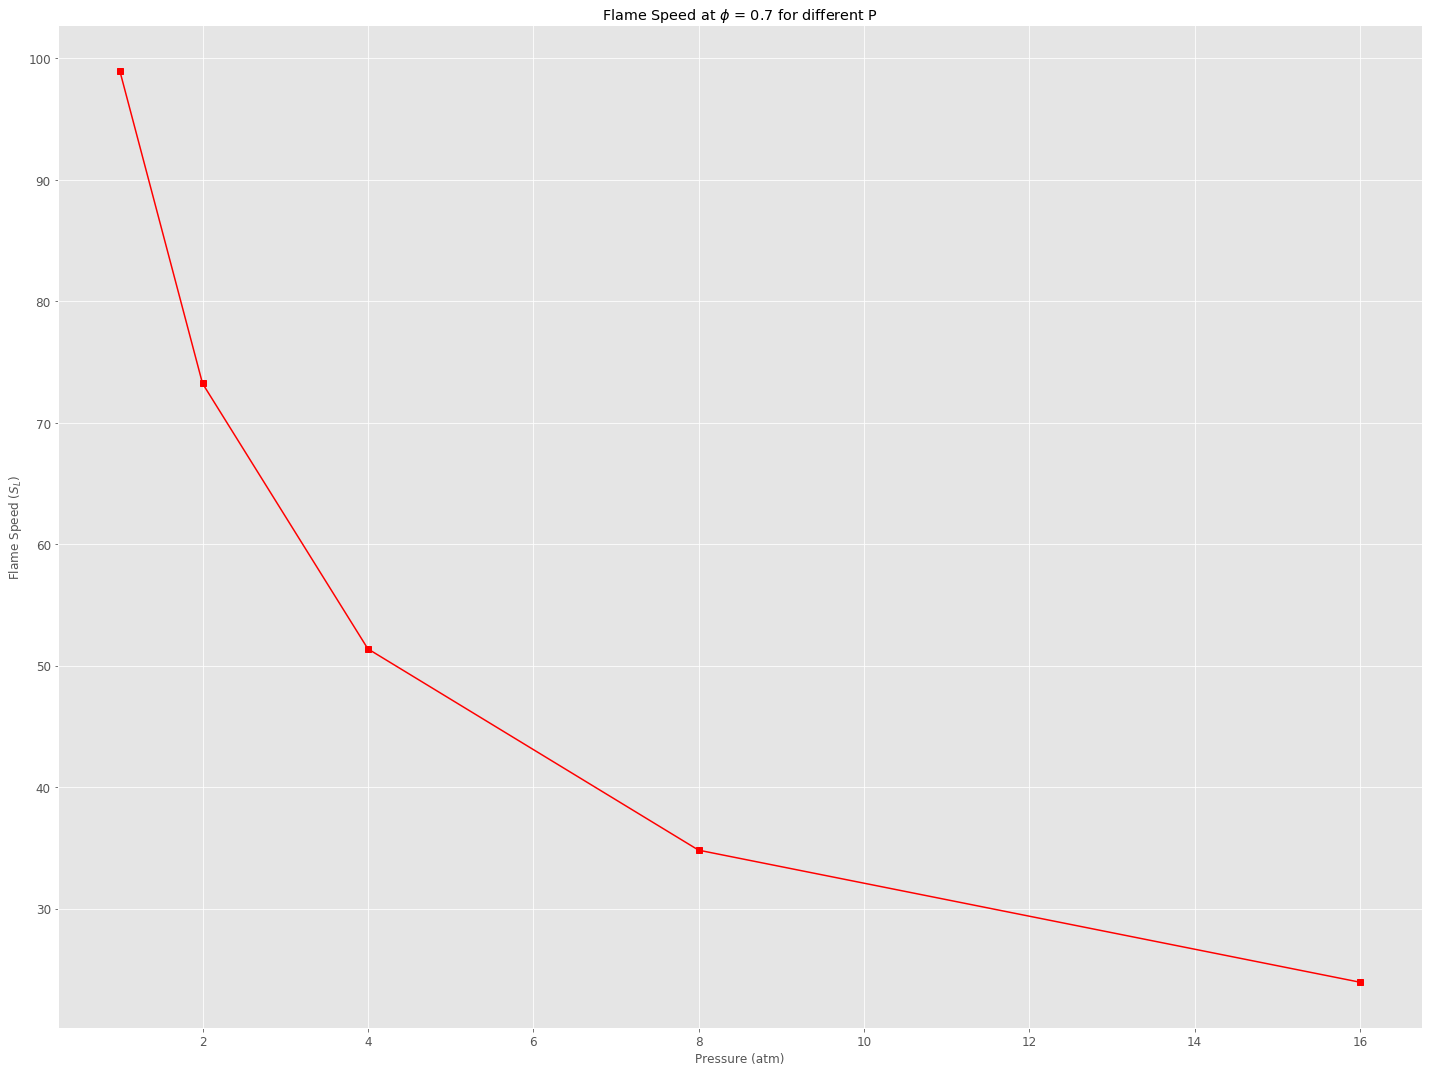

In [53]:
fig = plt.figure(figsize=(20,15))
plt.plot(P_ini, flamespeed_P_ini,'-s', color='red')

plt.title('Flame Speed at $\phi$ = 0.7 for different P')
plt.xlabel('Pressure (atm)')
plt.ylabel('Flame Speed ($S_L$)')
plt.grid(True)

In [54]:
i=0;j=0;k=0;l=0;m=0
for i in range(grid1):
    if B1[i,2]-max(B1[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t1[i],B1[i,2]))
        break
for j in range(grid2):
    if B2[j,2]-max(B2[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t2[j],B2[j,2]))
        break
for k in range(grid3):
    if B3[k,2]-max(B3[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t3[k],B3[k,2]))
        break
for l in range(grid4):
    if B4[l,2]-max(B4[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t4[l],B4[l,2]))
        break
for m in range(grid5):
    if B5[m,2]-max(B5[:,2])==0:
        print('The max heat release rate occurs at time %5.6fs and is = %5.6f J/m^3-s'%(delta_t5[m],B5[m,2]))
        break

The max heat release rate occurs at time 0.007475s and is = 3106808774.125091 J/m^3-s
The max heat release rate occurs at time 0.010072s and is = 8113082197.451853 J/m^3-s
The max heat release rate occurs at time 0.014332s and is = 19320009165.602364 J/m^3-s
The max heat release rate occurs at time 0.021135s and is = 42208660891.594749 J/m^3-s
The max heat release rate occurs at time 0.030711s and is = 87377201505.035126 J/m^3-s


C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


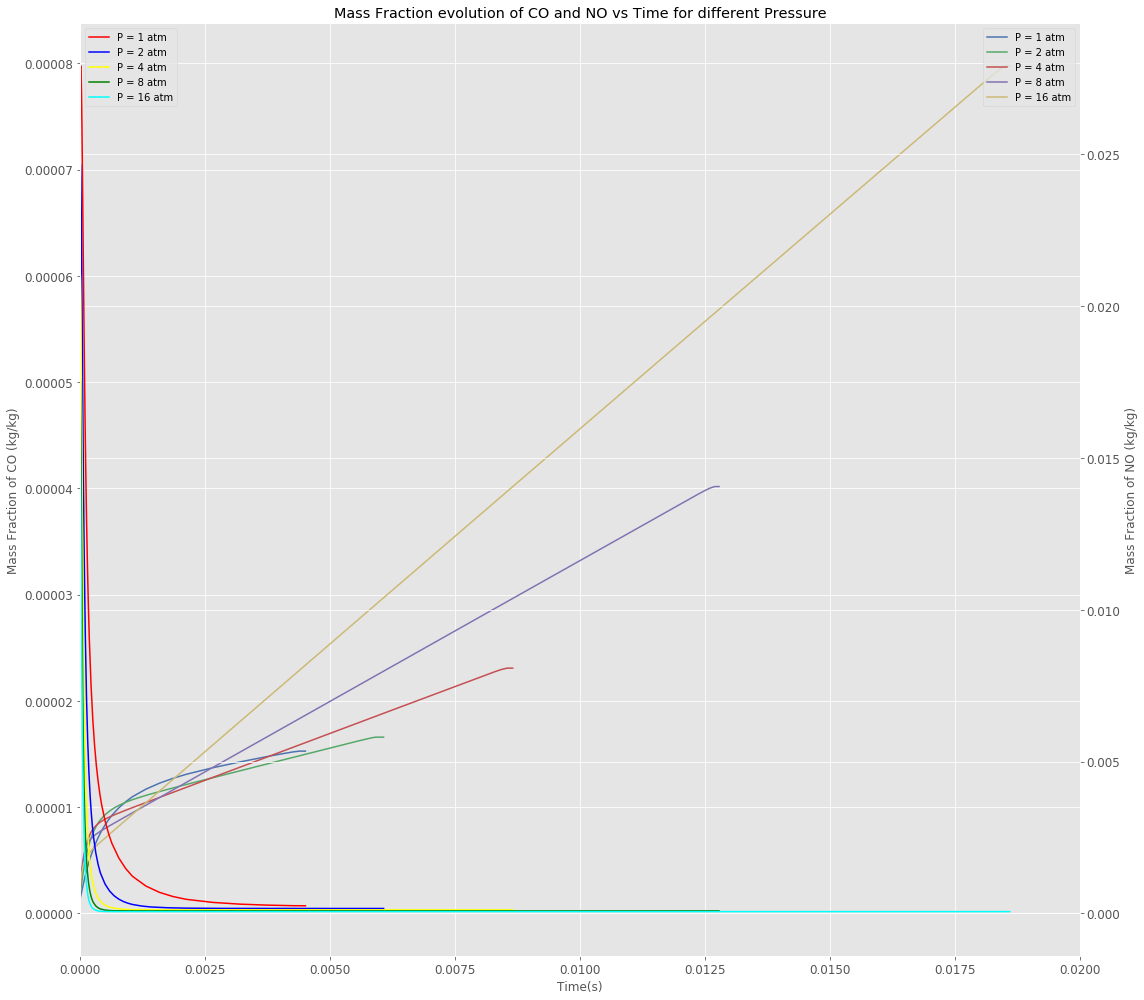

In [55]:
fig, ax1 = plt.subplots(figsize=(16,14))
ax2 = ax1.twinx()

ax1.plot(delta_t1-0.007475, B1[:,1], label=r'P = 1 atm')
ax1.plot(delta_t2-0.010072, B2[:,1], label=r'P = 2 atm')
ax1.plot(delta_t3-0.014332, B3[:,1], label=r'P = 4 atm')
ax1.plot(delta_t4-0.021135, B4[:,1], label=r'P = 8 atm')
ax1.plot(delta_t5-0.030711, B5[:,1], label=r'P = 16 atm')
ax2.plot(delta_t1-0.007475, B1[:,0], color = 'red', label=r'P = 1 atm')
ax2.plot(delta_t2-0.010072, B2[:,0], color = 'blue', label=r'P = 2 atm')
ax2.plot(delta_t3-0.014332, B3[:,0], color = 'yellow', label=r'P = 4 atm')
ax2.plot(delta_t4-0.021135, B4[:,0], color = 'green', label=r'P = 8 atm')
ax2.plot(delta_t5-0.030711, B5[:,0], color = 'cyan', label=r'P = 16 atm')

plt.title('Mass Fraction evolution of CO and NO vs Time for different Pressure')
ax1.set_xlabel('Time(s)')
ax2.set_ylabel('Mass Fraction of NO (kg/kg)')
ax1.set_ylabel('Mass Fraction of CO (kg/kg)')
ax2.legend(['CO'],loc=2)
ax1.legend(loc=1)
ax2.legend(loc=2)
plt.xlim([0, 0.02])
plt.grid(True)

In [56]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

P_ini = np.array([1, 2, 4, 8, 16])
flamespeed_P_ini = np.zeros(len(P_ini))

for i in range(len(P_ini)):
    To = 700
    Po = 101325*P_ini[i]

    gas = ct.Solution('gri30.cti')
    
    gas.TPX = To, Po, 'CH4:0.6, O2:2, N2:7.52'
    initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3
    flame = ct.FreeFlame(gas, initial_grid)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1
    flame.solve(loglevel=loglevel);
    Su0 = flame.u[0]
    grid_spacing = flame.grid
    velocity_flame = flame.u
    flamespeed_P_ini[i] = Su0*100
    
    if P_ini[i]==1:
        B1=np.zeros((len(grid_spacing),4))
        delta_t1=np.zeros(len(grid_spacing))
        add=0
        delta_t1[0] =0
        for i in range(len(grid_spacing)):
            B1[:,0]=flame.X[14]
            B1[:,1]=flame.X[35]
            B1[:,2]=flame.heat_release_rate
            B1[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t1[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t1[i+1]
        grid1=(len(grid_spacing))
        
        j=0
        grad = np.zeros(len(grid_spacing)-1)
        for j in range(len(grid_spacing)-1):
            grad[j] = (B1[j+1,3]-B1[j,3])/(grid_spacing[j+1]-grid_spacing[j])
            thickness1 = (max(B1[:,3]) -min(B1[:,3])) / max(grad)
        
        continue  
        
    if P_ini[i]==2:                    
        B2=np.zeros((len(grid_spacing),4))
        delta_t2=np.zeros(len(grid_spacing))
        add=0
        delta_t2[0] =0
        for j in range(len(grid_spacing)):
            B2[:,0]=flame.X[14]
            B2[:,1]=flame.X[35]
            B2[:,2]=flame.heat_release_rate
            B2[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t2[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t2[i+1]
        grid2=(len(grid_spacing))
                
        j=0
        grad = np.zeros(len(grid_spacing)-1)
        for j in range(len(grid_spacing)-1):
            grad[j] = (B2[j+1,3]-B2[j,3])/(grid_spacing[j+1]-grid_spacing[j])
            thickness2 = (max(B2[:,3]) -min(B2[:,3])) / max(grad)
            
        continue

        
    if P_ini[i]==4:
        B3=np.zeros((len(grid_spacing),4))
        delta_t3=np.zeros(len(grid_spacing))
        add=0
        delta_t3[0] =0
        for k in range(len(grid_spacing)):
            B3[:,0]=flame.X[14]
            B3[:,1]=flame.X[35]
            B3[:,2]=flame.heat_release_rate
            B3[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t3[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t3[i+1]
        grid3=(len(grid_spacing))
                
        j=0
        grad = np.zeros(len(grid_spacing)-1)
        for j in range(len(grid_spacing)-1):
            grad[j] = (B3[j+1,3]-B3[j,3])/(grid_spacing[j+1]-grid_spacing[j])
            thickness3 = (max(B3[:,3]) -min(B3[:,3])) / max(grad)
            
        continue
              
    if P_ini[i]==8:
        delta_t4=np.zeros(len(grid_spacing))
        B4=np.zeros((len(grid_spacing),4))
        add=0
        delta_t4[0] =0
        for l in range(len(grid_spacing)):
            B4[:,0]=flame.X[14]
            B4[:,1]=flame.X[35]
            B4[:,2]=flame.heat_release_rate
            B4[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t4[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t4[i+1]
        grid4=(len(grid_spacing))
               
        j=0
        grad = np.zeros(len(grid_spacing)-1)
        for j in range(len(grid_spacing)-1):
            grad[j] = (B4[j+1,3]-B4[j,3])/(grid_spacing[j+1]-grid_spacing[j])
            thickness4 = (max(B4[:,3]) -min(B4[:,3])) / max(grad)
        
        continue
    
    if P_ini[i]==16:
        delta_t5=np.zeros(len(grid_spacing))
        B5=np.zeros((len(grid_spacing),4))
        add=0
        delta_t5[0] =0
        for m in range(len(grid_spacing)):
            B5[:,0]=flame.X[14]
            B5[:,1]=flame.X[35]
            B5[:,2]=flame.heat_release_rate
            B5[:,3]=flame.T
        i=0
        for i in range(len(grid_spacing)-1):
            delta_t5[i+1]=time_calculator(grid_spacing[i],grid_spacing[i+1],velocity_flame[i],velocity_flame[i+1])+add
            add = delta_t5[i+1]
        grid5=(len(grid_spacing))
                
        j=0
        grad = np.zeros(len(grid_spacing)-1)
        for j in range(len(grid_spacing)-1):
            grad[j] = (B5[j+1,3]-B5[j,3])/(grid_spacing[j+1]-grid_spacing[j])
            thickness5 = (max(B5[:,3]) -min(B5[:,3])) / max(grad)
        
        continue


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.407e-05      3.778
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001642       3.49
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04209      2.264
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.3196     0.5704
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N2 N2


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     3.204e-05      3.818
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0008211      3.354
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02104       2.68
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1198      1.921
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H2 C2H4 C2H5 C2H6 C3H8 CH2 CH2CHO CH2CO CH2O CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCOH HCN HCNO HCO HNCO HO2 N2 N2O NO NO2 O 

Attempt Newton solution of steady-state problem...    success.

Problem solved on [125] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2CO CH2OH CH3 CH3CHO HCCO HCO HO2 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [145] point grid(s).

..............................................................................
no new points needed in flame


C:\ProgramFolder\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in double_scalars



..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     1.068e-05      4.323
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0002737      3.097
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.007014      2.893
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1798       1.66
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02844       2.91
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.7289     -0.242
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in f

Attempt Newton solution of steady-state problem...    success.

Problem solved on [123] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 47 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO H H2 H2O H2O2 HCCO HCO HO2 N2 O OH point 47 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [148] point grid(s).

..............................................................................
##############################################################################
Refining grid in flam

C:\ProgramFolder\Anaconda3\lib\site-packages\ipykernel_launcher.py:95: RuntimeWarning: divide by zero encountered in double_scalars



..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     5.339e-06      4.673
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0001368      2.911
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.003507      2.741
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.08988      2.079
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.02133      2.619
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.3644     0.6531
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in f

Attempt Newton solution of steady-state problem...    success.

Problem solved on [119] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO H H2 H2O H2O2 HCCO HCCOH HCO HO2 N2 NO2 O O2 OH T point 48 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [139] point grid(s).

..............................................................................
##############################################################################
Refining grid in fl

C:\ProgramFolder\Anaconda3\lib\site-packages\ipykernel_launcher.py:119: RuntimeWarning: divide by zero encountered in double_scalars



..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      2.67e-06       4.96
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     6.842e-05      2.995
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.001754      2.483
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.04494      2.144
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.01066      3.307
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.1822       1.08
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in f

Attempt Newton solution of steady-state problem...    success.

Problem solved on [116] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 
    to resolve C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCO HO2 N2 N2O NO2 O O2 OH T point 50 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    success.

Problem solved on [132] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.

C:\ProgramFolder\Anaconda3\lib\site-packages\ipykernel_launcher.py:143: RuntimeWarning: divide by zero encountered in double_scalars


In [57]:
print('Flame thickness for Pressure of 1 atm = ', thickness1)  
print('Flame thickness for Pressure of 2 atm = ', thickness2)
print('Flame thickness for Pressure of 4 atm = ', thickness3)
print('Flame thickness for Pressure of 8 atm = ', thickness4)
print('Flame thickness for Pressure of 16 atm = ', thickness5)

Flame thickness for Pressure of 1 atm =  0.00042128200778027814
Flame thickness for Pressure of 2 atm =  0.00025812686665354197
Flame thickness for Pressure of 4 atm =  0.00016719772381177162
Flame thickness for Pressure of 8 atm =  0.00011464833813129268
Flame thickness for Pressure of 16 atm =  8.035950764266893e-05


C:\ProgramFolder\Anaconda3\lib\site-packages\matplotlib\figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


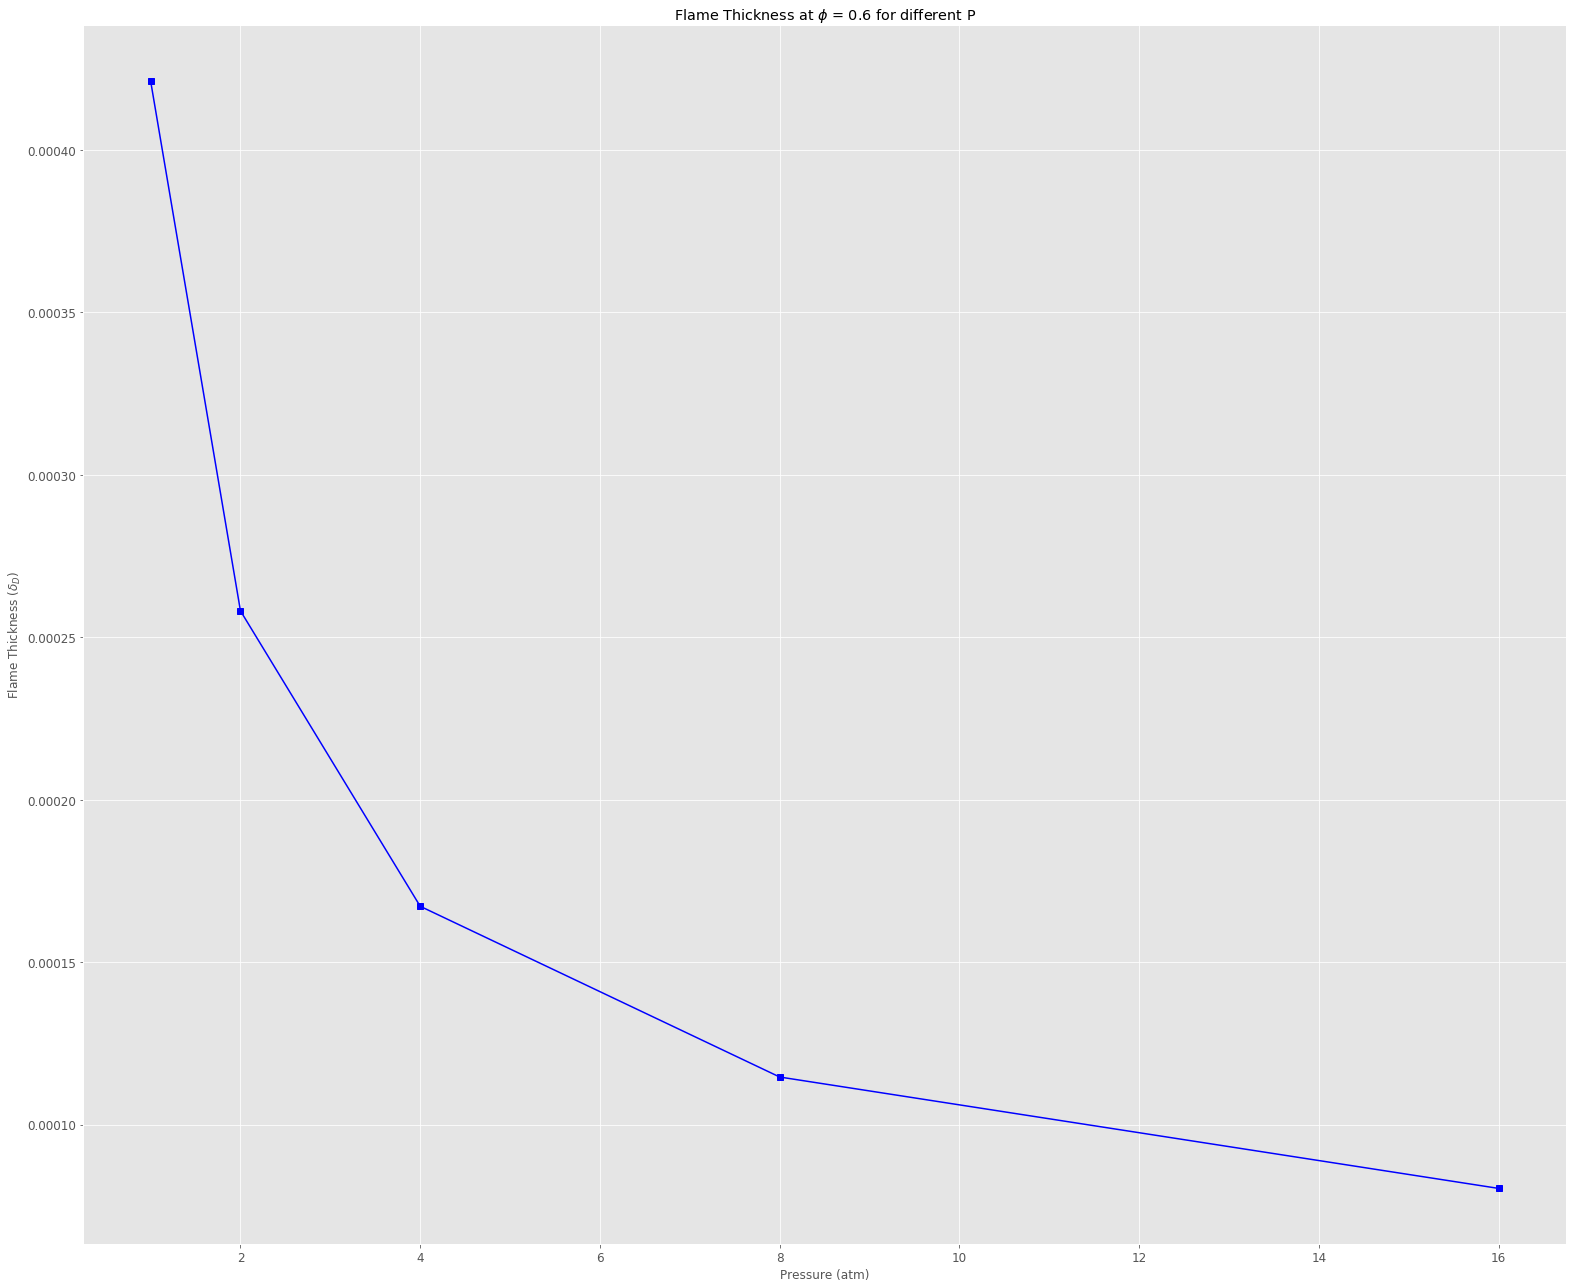

In [58]:
Thickness = np.array([thickness1, thickness2, thickness3, thickness4, thickness5])

fig = plt.figure(figsize=(22,18))
plt.plot(P_ini, Thickness,'-s', color='blue')

plt.title('Flame Thickness at $\phi$ = 0.6 for different P')
plt.xlabel('Pressure (atm)')
plt.ylabel('Flame Thickness ($\delta_D$)')
plt.grid(True)

For a given $\phi$, flame speed ($S_L$) decreases with increasing pressure.

The decreasing trend of flame speed with pressure, for a given $\phi$, depicts the fundamental importance of the pressure-sensitive chain mechanisms in the flame propagation process. 

Using the $H$-$O_2$ reactions as an example.

$H1:$ $H$ +$O_2$ ---> $OH$ + $O$ 

This reaction is a two body, temperature-sensitive branching reaction, while reaction 

$H9:$ $H$ + $O_2$ ---> $HO_2$ + $M$ 

is a three body, temperature-insensitive, inhibiting reaction. Therefore, by fixing $\phi$, $T_{ad}$ and thereby the intensity of $H1$ is approximately fixed. In contrast, by increasing pressure, $H9$ is enhanced relative to $H1$ because three-body reactions are favored over two-body reaction as pressure increases. A retarding effect is therefore imposed on the overall progress of the reaction with increasing pressure. 

Although the chain-termination reactions become more important with increasing pressure, the effect is not sufficiently large to be responsible for the observed decreasing trend of flame speed, which is actually caused by the increasing density, $\rho_u$, with increasing pressure.

## 2.2 Sensitivity Analysis

In [59]:
%matplotlib inline
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

gas = ct.Solution('gri30.cti')
sensitivities_lean = pd.DataFrame(data=[], index=gas.reaction_equations(range(gas.n_reactions)))
sensitivities_stoich = pd.DataFrame(data=[], index=gas.reaction_equations(range(gas.n_reactions)))
sensitivities_rich = pd.DataFrame(data=[], index=gas.reaction_equations(range(gas.n_reactions)))

dk = 1e-2


sensitivities_lean["baseCase"] = ""
sensitivities_stoich["baseCase"] = ""
sensitivities_rich["baseCase"] = ""
phi = np.array([0.4,1,1.4])
Su0=np.zeros((3))
for i in range(len(phi)):    
    To = 300
    Po = 101325
    gas.TPX = To, Po, 'CH4:%5.6f, O2:2, N2:7.52'%phi[i]
    width = 0.01
    initial_grid = 2*np.array([0.0, 0.001, 0.01, 0.02, 0.029, 0.03],'d')/3
    flame = ct.FreeFlame(gas, initial_grid)
    flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.1)
    loglevel = 1

    flame.solve(loglevel=loglevel)
    Su0[i] = flame.u[0]

    for m in range(gas.n_reactions):
   
        gas.set_multiplier(1.0)                                                                
        gas.set_multiplier(1+dk, m)
        
        flame.solve(loglevel=0, refine_grid=False)
 
        Su = flame.u[0]
        if (i==0):
            sensitivities_lean["baseCase"][m] = (Su-Su0[i])/(Su0[i]*dk) 
        if (i==1):
            sensitivities_stoich["baseCase"][m] = (Su-Su0[i])/(Su0[i]*dk)
        if (i==2):
            sensitivities_rich["baseCase"][m] = (Su-Su0[i])/(Su0[i]*dk)

    gas.set_multiplier(1.0)


..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0003844      3.845
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps      0.002189      3.358
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps       0.05611      1.765
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps        0.6392     0.4459
Attempt Newton solution of steady-state problem...    success.

Problem solved on [7] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 0 1 2 3 4 5 
    to resolve C2H2 C2H4 C2H5 C2H6 CH2CO CH2O CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCO HO2 N2 N2O NO NO2 O O2 OH T point 1 point 3 point 4 u 
#

Take 10 timesteps     2.136e-05       6.32
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     9.123e-05      5.223
Attempt Newton solution of steady-state problem...    success.

Problem solved on [34] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 3 8 9 10 11 12 13 14 15 16 17 18 19 20 21 29 
    to resolve C C2H2 C2H3 C2H4 C2H5 C2H6 C3H7 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CO CO2 H H2 H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HO2 N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T point 18 point 29 point 3 point 9 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Take 1

Take 10 timesteps     0.0002563      5.165
Attempt Newton solution of steady-state problem...    failure. 
Take 10 timesteps     0.0007298      4.049
Attempt Newton solution of steady-state problem...    success.

Problem solved on [22] point grid(s).

..............................................................................
##############################################################################
Refining grid in flame.
    New points inserted after grid points 3 4 5 6 7 8 9 10 11 12 13 14 18 
    to resolve C C2H C2H2 C2H3 C2H4 C2H5 C2H6 C3H8 CH CH2 CH2(S) CH2CHO CH2CO CH2O CH2OH CH3 CH3CHO CH3O CH3OH CH4 CN CO CO2 H H2 H2CN H2O H2O2 HCCO HCCOH HCN HCNO HCO HNCO HNO HO2 HOCN N N2 N2O NCO NH NH2 NH3 NO NO2 O O2 OH T point 11 point 18 point 3 point 6 u 
##############################################################################

..............................................................................
Attempt Newton solution of steady-state problem...    failure. 
Tak

In [26]:
sensitivities_lean.head()

,baseCase
2 O + M <=> O2 + M,0.00859299
H + O + M <=> OH + M,0.0109861
H2 + O <=> H + OH,0.0246237
HO2 + O <=> O2 + OH,-0.104413
H2O2 + O <=> HO2 + OH,-0.00502646


In [27]:
sensitivities_stoich.head()

,baseCase
2 O + M <=> O2 + M,0.00172441
H + O + M <=> OH + M,0.000919539
H2 + O <=> H + OH,0.0251968
HO2 + O <=> O2 + OH,0.00295535
H2O2 + O <=> HO2 + OH,0.000604471


In [28]:
sensitivities_rich.head()

,baseCase
2 O + M <=> O2 + M,-0.00954016
H + O + M <=> OH + M,-0.00914432
H2 + O <=> H + OH,0.00546064
HO2 + O <=> O2 + OH,-0.0106312
H2O2 + O <=> HO2 + OH,-0.00898717


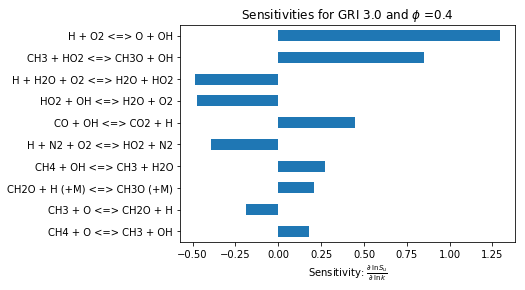

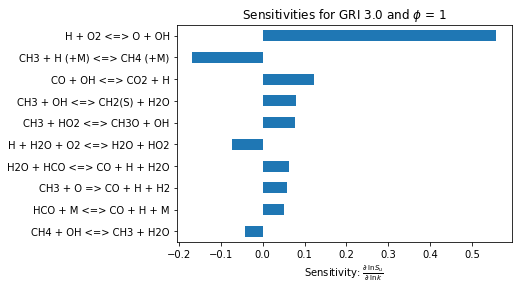

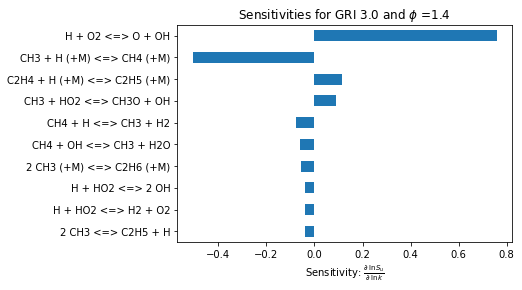

In [38]:
threshold1 = 0.1800
threshold2 = 0.0380
threshold3 = 0.0360
firstColumn_lean = sensitivities_lean.columns[0]
firstColumn_stoich = sensitivities_stoich.columns[0]
firstColumn_rich = sensitivities_rich.columns[0]

sensitivities_lean_Subset = sensitivities_lean[sensitivities_lean[firstColumn_lean].abs() > threshold1]
sensitivities_stoich_Subset = sensitivities_stoich[sensitivities_stoich[firstColumn_stoich].abs() > threshold2]
sensitivities_rich_Subset = sensitivities_rich[sensitivities_rich[firstColumn_rich].abs() > threshold3]
indicesMeetingThreshold_lean = sensitivities_lean_Subset[firstColumn_lean].abs().sort_values(ascending=False).index
indicesMeetingThreshold_stoich = sensitivities_stoich_Subset[firstColumn_stoich].abs().sort_values(ascending=False).index
indicesMeetingThreshold_rich = sensitivities_rich_Subset[firstColumn_rich].abs().sort_values(ascending=False).index
sensitivities_lean_Subset.loc[indicesMeetingThreshold_lean].plot.barh(title="Sensitivities for GRI 3.0 and $\phi$ =0.4",legend=None)

plt.gca().invert_yaxis()
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{S_{u}}}{\partial\:\ln{k}}$');
plt.show()
sensitivities_stoich_Subset.loc[indicesMeetingThreshold_stoich].plot.barh(title="Sensitivities for GRI 3.0 and $\phi$ = 1",legend=None)
plt.gca().invert_yaxis()
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{S_{u}}}{\partial\:\ln{k}}$');
plt.show()
sensitivities_rich_Subset.loc[indicesMeetingThreshold_rich].plot.barh(title="Sensitivities for GRI 3.0 and $\phi$ =1.4",legend=None)
plt.gca().invert_yaxis()
plt.xlabel(r'Sensitivity: $\frac{\partial\:\ln{S_{u}}}{\partial\:\ln{k}}$');
plt.show()

# Conclusion

The project gave us keen insight on how flame front analysis is carried out in industry. The analysis of products of combustion based on flow velocities also gave us an idea of how a process can be improved to produce least amount of extraneous pollutants like $CO$ and $NO$. 

The laminar premixed flame analysis gave us a through insight into the topic of laminar flame speeds and its changes depending on the environement that it was being propogated in. The flame structure and emissions section showed us how varying equivalence ratios changed amount of toxic gases emitted by the combuster.
